<a href="https://colab.research.google.com/github/EstevamHenrique/Portifolio1/blob/main/Churn_App_Delivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Churn App Delivery**





# **Metodologia CRISP-DM**

### **CRISP-DM**, ou **Cross-Industry Standard Process for Data Mining**, é uma abordagem amplamente utilizada para guiar projetos de mineração de dados. Aqui está um resumo das etapas principais:

### **Entendimento do negócio:** Nesta fase inicial, os objetivos do projeto são definidos a partir da perspectiva dos negócios. Isso envolve compreender os requisitos, metas e recursos disponíveis.
### **Entendimento dos dados:** Os dados relevantes são coletados, explorados e inicialmente preparados para análise. Isso inclui a identificação de fontes de dados, a avaliação da qualidade dos dados e a seleção das variáveis mais pertinentes para o problema em questão.
###**Preparação dos dados**: Nesta etapa, os dados são limpos, transformados e integrados conforme necessário para a análise. Isso pode envolver a remoção de valores ausentes, a normalização de dados e a criação de variáveis derivadas.
###**Modelagem:** Aqui, diversas técnicas de modelagem são aplicadas aos dados preparados para desenvolver modelos que possam prever ou classificar padrões relevantes. Esta fase também inclui a seleção e ajuste dos modelos para otimizar seu desempenho.
###**Avaliação:** Os modelos criados são avaliados com base nos critérios estabelecidos durante o entendimento do negócio. Isso envolve a análise de métricas de desempenho, validação cruzada e, possivelmente, a realização de testes em conjuntos de dados de validação ou teste.
###**Implantação:** Uma vez que um modelo satisfatório tenha sido desenvolvido e avaliado, ele é implantado no ambiente de produção. Isso pode incluir a integração do modelo em sistemas existentes ou a implementação de soluções para uso prático.
###**Monitoramento:** Esta fase envolve o monitoramento contínuo do desempenho do modelo implantado no ambiente de produção. Isso permite identificar desvios de desempenho ao longo do tempo e tomar medidas corretivas, se necessário.
###Essas etapas não são necessariamente lineares e iterativas, e muitas vezes é necessário revisitar etapas anteriores conforme novos insights são descobertos ou novos requisitos surgem. O CRISP-DM fornece uma estrutura flexível e robusta para orientar o processo de mineração de dados em diversos contextos industriais.

# **ENTENDIMENTO DO NEGÓCIO**

## **Churn_App_Delivery**

### O aplicativo ToComFome é um app de entrega de comida por delivery. Como todo aplicativo de varejo, a empresa se preocupa com o Churn de clientes, ou seja, da perda desse cliente para a concorrência. Para entender o perfil de risco do cliente com maior chance de churn, a área de CRM pediu um projeto para a área de Data Analytics para entender e classificar o cliente com risco de trocar de aplicativo nos próximos meses.

### Para isso, a área de CRM passou uma amostra de cerca de 10 mil clientes com suas respectivas informações de cadastro e transações nos próximos 4 meses a contar da data de extração usada como referência.

### Você foi convidado para atuar neste projeto, e como um(a) bom(a) analista de dados, é importante que você organize e estruture todas as etapas do trabalho. Esse material deverá ser apresentado aos executivos responsáveis pela área.

### Quais fatores de risco estão associados com o Churn de Clientes?

## **1.Quais fatores o time de Atração de Talentos deve olhar para selecionar candidatos com maior chance de ter boa performance após 6 meses à data da contratação?**

## **2.Segmentar os clientes com a probabilidade de darem Churn nos próximos 4 meses em relação à data de extração de referência.**

## **3.Quais os possíveis planos de ação que a empresa pode fazer para diminuir esse problema?**



# **Instalando e Importando bibliotecas para o projeto**

In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install pandas-profiling
!pip install dtreeviz
!pip install sweetviz
!pip install pydantic-settings
!pip install scikit-learn
!pip install ydata_profiling
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 6.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=215680f870bee1b49b7a812272a0ae5cce0d401fc3f516626fc9b5a4c8fa4b28
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
     ━━━━━━━━━━━━━━

## Importando Bibliotecas

In [ ]:
# Pacotes de preparação de dados
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

# Pacotes Gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import dtreeviz

#Pacotes de Modelagem
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from scipy.stats import ks_2samp
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# **importando Base de Dados**

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Cases/Churn_APP_Delivery/base_churn.xlsx')
df.head(5)

ClientId DataExtracao  Score_Credito          Estado    Gênero  Idade  \
0    345568   2019-06-30            619       São Paulo  Feminino     42   
1    345569   2019-06-30            608  Rio de Janeiro  Feminino     41   
2    345570   2019-06-30            502       São Paulo  Feminino     42   
3    345571   2019-06-30            699       São Paulo  Feminino     39   
4    345572   2019-06-30            850  Rio de Janeiro  Feminino     43   

   Tempo_Cliente  Limite_Credito_Mercado  Qte_Categorias  Usa_Cartao_Credito  \
0              2                  0.0000               1                   1   
1              1                838.0786               1                   0   
2              8               1596.6080               3                   1   
3              1                  0.0000               2                   0   
4              2               1255.1082               1                   1   

   Programa_Fidelidade  Sum_Pedidos_Acumulados DataUltimaTransacao  Churn?  
0                    1                     422          2019-09-14       1  
1                    1                     468          2019-10-05       0  
2                    0                     474          2019-08-20       1  
3                    0                     390          2019-10-21       0  
4                    1                     329          2019-10-26       0

# **Entendimento e Preparação dos Dados**

## **Tipos de Variáveis**




Esta é uma análise preliminar de um DataFrame com 7240 entradas e 14 colunas.
A maioria das variáveis parece ser categórica, representada como objetos, enquanto duas são numéricas (Id_Agente e Boa_Performance). As variáveis categóricas provavelmente precisarão ser codificadas de alguma forma para serem utilizadas em modelos de aprendizado de máquina, enquanto as variáveis numéricas podem ser utilizadas diretamente.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ClientId                10000 non-null  int64         
 1   DataExtracao            10000 non-null  datetime64[ns]
 2   Score_Credito           10000 non-null  int64         
 3   Estado                  10000 non-null  object        
 4   Gênero                  10000 non-null  object        
 5   Idade                   10000 non-null  int64         
 6   Tempo_Cliente           10000 non-null  int64         
 7   Limite_Credito_Mercado  10000 non-null  float64       
 8   Qte_Categorias          10000 non-null  int64         
 9   Usa_Cartao_Credito      10000 non-null  int64         
 10  Programa_Fidelidade     10000 non-null  int64         
 11  Sum_Pedidos_Acumulados  10000 non-null  int64         
 12  DataUltimaTransacao     10000 non-null  datetim

## **Missing Values**
### A base de dados não possui nenhuma informação faltante

In [ ]:
df.isnull().sum()

ClientId                  0
DataExtracao              0
Score_Credito             0
Estado                    0
Gênero                    0
Idade                     0
Tempo_Cliente             0
Limite_Credito_Mercado    0
Qte_Categorias            0
Usa_Cartao_Credito        0
Programa_Fidelidade       0
Sum_Pedidos_Acumulados    0
DataUltimaTransacao       0
Churn?                    0
dtype: int64

## **Duplicações**
### O banco de dados não possui duplicaçãos

In [ ]:
df.index.duplicated().sum()

0

# **Analise Exploratória**

## **Funções para Analises IV e Frequência**

### **Função para Analise IV (Information Values)**

In [ ]:
def gera_relatorios_aed(df, html_pp='base_aed_pp.html'):
    '''
    '''
    # Gera relatório usando ydata_profiling
    perfil_pp = ProfileReport(df, title="Profiling Report")
    perfil_pp.to_file(output_file=html_pp)

    return perfil_pp


class analise_iv:

    # função private
    def __get_tab_bivariada(self, var_escolhida):

        # Cria a contagem de Target_1 e Target_0
        df_aux = self.df.copy()
        df_aux['target2'] = self.df[self.target]
        df2 = df_aux.pivot_table(values='target2',
                                 index=var_escolhida,
                                 columns=self.target,
                                 aggfunc='count')

        df2 = df2.rename(columns={0:'#Target_0',
                                  1:'#Target_1'})
        df2.fillna(0, inplace=True)

        # Cria as demais colunas da tabela bivariada
        df2['Total'] = (df2['#Target_0'] + df2['#Target_1'])
        df2['%Freq'] = (df2['Total'] / (df2['Total'].sum()) * 100).round(decimals=4)
        df2['%Target_1'] = (df2['#Target_1'] / (df2['#Target_1'].sum()) * 100).round(decimals=4)
        df2['%Target_0'] = (df2['#Target_0'] / (df2['#Target_0'].sum()) * 100).round(decimals=4)
        df2['%Target_0'] = df2['%Target_0'].apply(lambda x: 0.01 if x == 0 else x) #corrige problema do log indeterminado
        df2['%Taxa_de_Target_1'] = (df2['#Target_1'] / df2['Total'] * 100).round(decimals=4)
        df2['Odds'] = (df2['%Target_1'] / df2['%Target_0']).round(decimals=4)
        df2['Odds'] = df2.Odds.apply(lambda x: 0.01 if x == 0 else x) #corrige problema do log indeterminado
        df2['LN(Odds)'] = np.log(df2['Odds']).round(decimals=4)
        df2['IV'] = (((df2['%Target_1'] / 100 - df2['%Target_0'] / 100) * df2['LN(Odds)'])).round(decimals=4)
        df2['IV'] = np.where(df2['Odds'] == 0.01, 0 , df2['IV'])

        df2 = df2.reset_index()
        df2['Variavel'] = var_escolhida
        df2 = df2.rename(columns={var_escolhida: 'Var_Range'})
        df2 = df2[['Variavel','Var_Range', '#Target_1','#Target_0', 'Total', '%Freq', '%Target_1', '%Target_0',
       '%Taxa_de_Target_1', 'Odds', 'LN(Odds)', 'IV']]

        # Guarda uma cópia da tabela no histórico
        self.df_tabs_iv = pd.concat([self.df_tabs_iv, df2], axis = 0)

        return df2

    def get_bivariada(self, var_escolhida='all_vars'):

        if var_escolhida == 'all_vars':

            #vars = self.df.drop(self.target,axis = 1).columns
            vars = self.get_lista_iv().index
            for var in vars:
                tabela = self.df_tabs_iv[self.df_tabs_iv['Variavel'] == var]
                print('==> "{}" tem IV de {}'.format(var,self.df_tabs_iv[self.df_tabs_iv['Variavel'] == var]['IV'].sum().round(decimals=4)))
                # printa a tabela no Jupyter
                display(tabela)

            return

        else:
            print('==> "{}" tem IV de {}'.format(var_escolhida,self.df_tabs_iv[self.df_tabs_iv['Variavel'] == var_escolhida]['IV'].sum().round(decimals=4)))
            return self.df_tabs_iv[self.df_tabs_iv['Variavel'] == var_escolhida]


    def get_lista_iv(self):


        # agrupa a lista de IV's em ordem descrescente
        lista = (self.df_tabs_iv.groupby('Variavel').agg({'IV':'sum'})).sort_values(by=['IV'],ascending=False)

        return lista



    def __init__(self, df, target, nbins=10):

        self.df = df.copy()
        self.target = target

        #lista de variaveis numericas
        df_num = self.df.loc[:,((self.df.dtypes == 'int32') |
                                (self.df.dtypes == 'int64') |
                                (self.df.dtypes == 'float64')
                               )
                            ]

        vars = df_num.drop(target,axis = 1).columns

        for var in vars:
            nome_var = 'fx_' + var
            df_num[nome_var] = pd.qcut(df_num[var],
                                       q=nbins,
                                       precision=2,
                                       duplicates='drop')
            df_num = df_num.drop(var, axis = 1)
            df_num = df_num.rename(columns={nome_var: var})

        #lista de variaveis qualitativas
        df_str = self.df.loc[:,((self.df.dtypes == 'object') |
                                (self.df.dtypes == 'category') |
                                (self.df.dtypes == 'bool'))]


        self.df = pd.concat([df_num,df_str],axis = 1)


         # inicializa tab historica
        self.df_tabs_iv = pd.DataFrame()

        vars = self.df.drop(self.target,axis = 1).columns
        for var in vars:
            self.__get_tab_bivariada(var);

        # remove tabs de iv duplicadas
        self.df_tabs_iv = self.df_tabs_iv.drop_duplicates(subset=['Variavel','Var_Range'], keep='last')


# Função para cálculo do KS
def ks_stat(y, y_pred):
    return ks_2samp(y_pred[y==1], y_pred[y!=1]).statistic

# Função para cálculo do desempenho de modelos
def calcula_desempenho(modelo, x_train, y_train, x_test, y_test):

    # Cálculo dos valores preditos
    ypred_train = modelo.predict(x_train)
    ypred_proba_train = modelo.predict_proba(x_train)[:,1]

    ypred_test = modelo.predict(x_test)
    ypred_proba_test = modelo.predict_proba(x_test)[:,1]

    # Métricas de Desempenho
    acc_train = accuracy_score(y_train, ypred_train)
    acc_test = accuracy_score(y_test, ypred_test)

    roc_train = roc_auc_score(y_train, ypred_proba_train)
    roc_test = roc_auc_score(y_test, ypred_proba_test)

    ks_train = ks_stat(y_train, ypred_proba_train)
    ks_test = ks_stat(y_test, ypred_proba_test)

    prec_train = precision_score(y_train, ypred_train, zero_division=0)
    prec_test = precision_score(y_test, ypred_test, zero_division=0)

    recl_train = recall_score(y_train, ypred_train)
    recl_test = recall_score(y_test, ypred_test)

    f1_train = f1_score(y_train, ypred_train)
    f1_test = f1_score(y_test, ypred_test)

    df_desemp = pd.DataFrame({'Treino':[acc_train, roc_train, ks_train,
                                        prec_train, recl_train, f1_train],
                              'Teste':[acc_test, roc_test, ks_test,
                                       prec_test, recl_test, f1_test]},
                            index=['Acurácia','AUROC','KS',
                                   'Precision','Recall','F1'])

    df_desemp['Variação'] = round(df_desemp['Teste'] / df_desemp['Treino'] - 1, 2)

    return df_desemp

### **Função Frequência Absoluta, Freqência Relativa e Frequência Acumulada**

In [ ]:
def frequencias(dados, variavel):
  """
  Função que calcula frequências absolutas, relativas e acumuladas, e cria um DataFrame.

  Argumentos:
    dados: Um DataFrame contendo os dados.
    variavel: Nome da coluna que contém os dados a serem analisados.

  Retorna:
    Um DataFrame com as seguintes colunas:
      * Classe: Intervalos da variável categorizada.
      * Frequência Absoluta: Número de ocorrências de cada categoria.
      * Frequência Relativa: Proporção de cada categoria em relação ao total.
      * Frequência Acumulada: Soma das frequências relativas até a categoria atual.
  """

  # Verifica se a variável existe no DataFrame
  if variavel not in dados.columns:
    raise ValueError(f"A coluna '{variavel}' não existe no DataFrame.")

  # Cria um DataFrame vazio para armazenar os resultados
  df_frequencias = pd.DataFrame(columns=['Classe', 'Frequência Absoluta', 'Frequência Relativa', 'Frequência Acumulada'])

  # Obtém a contagem de frequências absolutas
  contagem_absoluta = dados[variavel].value_counts()

  # Converte a contagem em um DataFrame com colunas 'Classe' e 'Frequência Absoluta'
  df_contagem_absoluta = contagem_absoluta.to_frame().reset_index()
  df_contagem_absoluta.columns = ['Classe', 'Frequência Absoluta']

  # Calcula a frequência relativa
  df_contagem_absoluta['Frequência Relativa'] = df_contagem_absoluta['Frequência Absoluta'] / dados.shape[0]

  # Calcula a frequência acumulada
  df_contagem_absoluta['Frequência Acumulada'] = df_contagem_absoluta['Frequência Relativa'].cumsum()

  # Combina os DataFrames (concatenação)
  df_frequencias = pd.concat([df_frequencias, df_contagem_absoluta], ignore_index=True)

  # Renomeia a coluna 'Classe' para o nome da variável original
  df_frequencias.rename(columns={'Classe': variavel}, inplace=True)

  # Retorna o DataFrame com as frequências
  return df_frequencias

  # Exemplo de uso
#dados = pd.DataFrame({
  #'Idade': [25, 30, 22, 27, 28, 33, 25],
  #'Sexo': ['M', 'F', 'M', 'F', 'M', 'F', 'M'],
  #'Cidade': ['São Paulo', 'Rio de Janeiro', 'São Paulo', 'Rio de Janeiro', 'São Paulo', 'Rio de Janeiro', 'São Paulo']
#})

#df_frequencias_idade = frequencias(dados, 'Idade')
#print(df_frequencias_idade)

### **Função Gráfico de pareto**

In [ ]:
def plotar_grafico_pareto(df, indice_classe, indice_frequencia_absoluta, indice_frequencia_relativa_acumulada):
    """
    Função para plotar o gráfico de Pareto a partir de um DataFrame e índices de colunas específicos.

    Argumentos:
      df: Um DataFrame contendo os dados.
      indice_classe: Índice da coluna que contém os dados da classe (por exemplo, 0).
      indice_frequencia_absoluta: Índice da coluna que contém os dados da frequência absoluta (por exemplo, 1).
      indice_frequencia_relativa_acumulada: Índice da coluna que contém os dados da frequência relativa acumulada (por exemplo, 3).

    Observações:
      * O DataFrame deve estar ordenado por ordem decrescente de frequência absoluta.
    """

    # Ordena o DataFrame por frequência absoluta
    df = df.sort_values(by=df.columns[indice_frequencia_absoluta], ascending=False)

    # Extrai os dados das colunas especificadas pelos índices
    classe = df.iloc[:, indice_classe].to_numpy()
    frequencia_absoluta = df.iloc[:, indice_frequencia_absoluta].to_numpy()
    frequencia_relativa_acumulada = df.iloc[:, indice_frequencia_relativa_acumulada].to_numpy()

    # Define a figura e os eixos para o gráfico
    fig, ax1 = plt.subplots(figsize=(12, 8))  # Aumentando o tamanho do gráfico

    # Plota as barras de frequência absoluta
    barras = ax1.bar(classe, frequencia_absoluta, color='b', alpha=0.7, label='Frequência Absoluta', width=0.8)  # Aumentando a largura das barras

    # Adiciona legendas nas barras com a frequência absoluta
    for barra in barras:
        altura = barra.get_height()
        ax1.annotate('{:.2f}'.format(altura),  # Formatando para duas casas decimais
                    xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Define o eixo y da esquerda para a frequência relativa
    ax1.set_ylabel("Frequência Relativa", color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Cria um segundo eixo y para a frequência acumulada
    ax2 = ax1.twinx()
    ax2.plot(classe, frequencia_relativa_acumulada, color='green', marker='o', label='Frequência Relativa Acumulada')
    ax2.set_ylabel("Frequência Acumulada", color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    # Plota a linha de referência de 80%
    ax2.axhline(y=0.8 * frequencia_absoluta.sum(), color='red', linestyle='--', label='80%')

    # Define os rótulos e títulos dos eixos
    ax1.set_xlabel(f"Coluna {indice_classe}")
    ax1.set_title('Gráfico de Pareto')

    # Rotaciona os rótulos do eixo x para melhor visualização
    ax1.set_xticklabels(classe, rotation=45, ha='right')

    # Adiciona legendas
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Mostra o gráfico
    plt.show()

# Exemplo de uso (com o DataFrame e os índices das colunas)
# plotar_grafico_pareto(df_frequencias_idade, 0, 1, 3)  # Assumindo que os índices estão corretos


### **Função Grafico de Barras**

In [ ]:
def plotar_grafico_barras(df, variavel, frequencia_absoluta):
    # Define os dados para o gráfico de barras
    labels = df[variavel]
    values = df[frequencia_absoluta]

    # Cria o gráfico de barras
    plt.bar(labels, values, color='blue')

    # Adiciona título e rótulos dos eixos
    plt.title('Gráfico de Barras - ' + variavel)
    plt.xlabel('Grupos')
    plt.ylabel('Freq Absoluta')

    # Rotaciona os rótulos do eixo x para melhor visualização
    plt.xticks(rotation=45, ha='right')

    # Adiciona valores acima das barras
    for i, value in enumerate(values):
        plt.text(i, value, str(value), ha='center', va='bottom')

    # Mostra o gráfico
    plt.show()

# Exemplo de uso da função
# Supondo que 'df' seja o DataFrame com as frequências, 'Variavel' seja a coluna com as categorias e 'Frequência Absoluta' seja a coluna com as frequências absolutas
# plotar_grafico_barras(df, 'Variavel', 'Frequência Absoluta')


## **Variável "Target" Churn?**


In [ ]:
# Definindo o número de categorias desejadas
num_categorias = 10

# Calculando a amplitude total da idade
amplitude = 92 - 18

# Calculando o tamanho de cada intervalo
tamanho_intervalo = amplitude / num_categorias

# Criando os limites dos intervalos
limites_intervalos = [18 + i * tamanho_intervalo for i in range(num_categorias)]
limites_intervalos.append(92)  # Adicionando o limite máximo

# Definindo os rótulos das categorias
categorias = [f'Categoria {i+1}' for i in range(num_categorias)]

# Agrupando a variável 'Idade' em 10 categorias
df['Categoria_Idade'] = pd.cut(df['Idade'], bins=limites_intervalos, labels=categorias, include_lowest=True)

# Visualizando as primeiras linhas do DataFrame com a nova coluna de categorias
print(df.head())


   ClientId DataExtracao  Score_Credito          Estado    Gênero  Idade  \
0    345568   2019-06-30            619       São Paulo  Feminino     42   
1    345569   2019-06-30            608  Rio de Janeiro  Feminino     41   
2    345570   2019-06-30            502       São Paulo  Feminino     42   
3    345571   2019-06-30            699       São Paulo  Feminino     39   
4    345572   2019-06-30            850  Rio de Janeiro  Feminino     43   

   Tempo_Cliente  Limite_Credito_Mercado  Qte_Categorias  Usa_Cartao_Credito  \
0              2                  0.0000               1                   1   
1              1                838.0786               1                   0   
2              8               1596.6080               3                   1   
3              1                  0.0000               2                   0   
4              2               1255.1082               1                   1   

   Programa_Fidelidade  Sum_Pedidos_Acumulados DataUltimaTrans

In [ ]:
# Definindo o número de categorias desejadas
num_categorias_lcm = 10

# Calculando a amplitude total da idade
amplitude = 2508 - 0

# Calculando o tamanho de cada intervalo
tamanho_intervalo_lcm = amplitude / num_categorias_lcm

# Criando os limites dos intervalos
limites_intervalos = [0 + i * tamanho_intervalo_lcm for i in range(num_categorias_lcm)]
limites_intervalos.append(2500)  # Adicionando o limite máximo

# Definindo os rótulos das categorias
faixas_lcm = [f'Faixa_lcm {i+1}' for i in range(num_categorias_lcm)]

# Agrupando a variável 'Idade' em 10 categorias
df['Categoria_lcm'] = pd.cut(df['Limite_Credito_Mercado'], bins=limites_intervalos, labels=faixas_lcm, include_lowest=True)

# Visualizando as primeiras linhas do DataFrame com a nova coluna de categorias
print(df.head())


   ClientId DataExtracao  Score_Credito          Estado    Gênero  Idade  \
0    345568   2019-06-30            619       São Paulo  Feminino     42   
1    345569   2019-06-30            608  Rio de Janeiro  Feminino     41   
2    345570   2019-06-30            502       São Paulo  Feminino     42   
3    345571   2019-06-30            699       São Paulo  Feminino     39   
4    345572   2019-06-30            850  Rio de Janeiro  Feminino     43   

   Tempo_Cliente  Limite_Credito_Mercado  Qte_Categorias  Usa_Cartao_Credito  \
0              2                  0.0000               1                   1   
1              1                838.0786               1                   0   
2              8               1596.6080               3                   1   
3              1                  0.0000               2                   0   
4              2               1255.1082               1                   1   

   Programa_Fidelidade  Sum_Pedidos_Acumulados DataUltimaTrans

In [ ]:
#Cria um data frame da coluna 'Target' boa_performance com a frequência absoluta, relativa e acumulada.
df_churn = frequencias(df, "Churn?")
df_churn.head()

Churn? Frequência Absoluta  Frequência Relativa  Frequência Acumulada
0      0                7987               0.7987                0.7987
1      1                2013               0.2013                1.0000

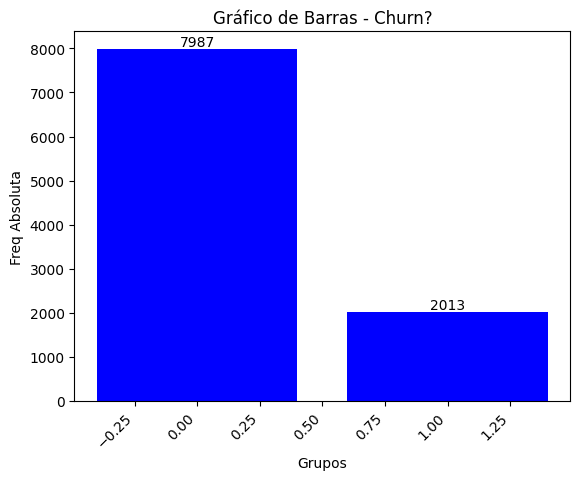

In [ ]:
plotar_grafico_barras(df= df_churn, variavel= 'Churn?', frequencia_absoluta= 'Frequência Absoluta' )

In [ ]:
df_iv = analise_iv(df, 'Churn?')
df_iv.get_lista_iv()

<ipython-input-7-01bd719da326>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Churn?                      IV
Variavel                      
Categoria_Idade         0.7964
Idade                   0.7708
Qte_Categorias          0.4172
Estado                  0.1668
Categoria_lcm           0.1218
Limite_Credito_Mercado  0.0957
Gênero                  0.0730
Score_Credito           0.0103
Tempo_Cliente           0.0090
ClientId                0.0040
Sum_Pedidos_Acumulados  0.0023
Programa_Fidelidade     0.0000
Usa_Cartao_Credito      0.0000

In [ ]:
gera_relatorios_aed(df)

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import sweetviz as sv

In [ ]:
report = sv.analyze(df, target_feat='Churn?')

# Abre o relatório no navegador
report.show_html('Sweetviz_Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Sweetviz_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### **Insights "Target" Churn?**

**Frequências**

* **Proporção de Churn vs. Não Churn:** A frequência relativa mostra que aproximadamente 79.87% dos clientes não têm churn, enquanto cerca de 20.13% dos clientes têm churn. Isso indica que a maioria dos clientes não deixou de utilizar o serviço ou produto.

* **Acompanhamento ao Longo do Tempo:** É importante monitorar essas frequências ao longo do tempo para detectar tendências e mudanças no comportamento dos clientes. Se a proporção de churn estiver aumentando, isso pode indicar problemas que precisam ser abordados.

* **Benchmarking e Comparação:** As frequências também podem ser usadas para benchmarking e comparação com períodos anteriores ou com concorrentes. Isso pode ajudar a empresa a avaliar seu desempenho em relação ao mercado e identificar áreas para melhoria.

**Análise Information Value(IV)**

1. **Idade (IV = 0.7708):** A idade parece ser uma variável altamente informativa na previsão do churn. Isso sugere que a idade dos clientes tem uma forte relação com sua propensão ao churn. Por exemplo, pode ser que clientes mais jovens ou mais velhos tenham maior probabilidade de churn em comparação com outros grupos etários.

2. **Quantidade de Categorias (IV = 0.4172):** A quantidade de categorias refere-se provavelmente à diversidade de produtos ou serviços que os clientes usam. Um IV relativamente alto indica que a quantidade de categorias também é um preditor importante de churn. Isso sugere que clientes que usam uma variedade maior de produtos ou serviços podem ser menos propensos a churn.

3. **Estado (IV = 0.1668):** O estado do cliente pode indicar sua localização geográfica. Um IV significativo sugere que o estado também desempenha um papel na previsão de churn. Pode haver diferenças no comportamento de churn entre diferentes regiões geográficas.

4. **Limite de Crédito no Mercado (IV = 0.0957):** O IV relativamente baixo sugere que o limite de crédito no mercado pode ter menos impacto na previsão de churn em comparação com outras variáveis. No entanto, ainda pode ser uma consideração importante, especialmente para determinados segmentos de clientes.

5. **Gênero (IV = 0.0730):** O gênero dos clientes também parece ter algum impacto na previsão de churn, embora seja menor em comparação com outras variáveis. Isso sugere que pode haver diferenças no comportamento de churn entre diferentes gêneros.

6. **Score de Crédito (IV = 0.0103):** O score de crédito tem um IV muito baixo, o que indica que pode ter uma influência mínima na previsão de churn.

7. **Tempo de Cliente (IV = 0.0090):** Similarmente ao score de crédito, o tempo de cliente também tem um IV baixo, indicando que pode ter uma influência limitada na previsão de churn.

8. **ClientId (IV = 0.0040):** O ID do cliente parece ter uma influência muito baixa na previsão de churn, sugerindo que ele pode ser descartado como uma variável preditora.

9. **Soma de Pedidos Acumulados (IV = 0.0023):** A soma de pedidos acumulados também tem um IV muito baixo, indicando que pode ter uma influência mínima na previsão de churn.

10. **Programa de Fidelidade e Uso de Cartão de Crédito (IV = 0.0000):** Ambas as variáveis têm um IV de zero, o que sugere que elas não contribuem para a previsão de churn com base nesta análise.


## **Variável Idade**

Criando Categorias de Idade

In [ ]:
df.head()

ClientId DataExtracao  Score_Credito          Estado    Gênero  Idade  \
0    345568   2019-06-30            619       São Paulo  Feminino     42   
1    345569   2019-06-30            608  Rio de Janeiro  Feminino     41   
2    345570   2019-06-30            502       São Paulo  Feminino     42   
3    345571   2019-06-30            699       São Paulo  Feminino     39   
4    345572   2019-06-30            850  Rio de Janeiro  Feminino     43   

   Tempo_Cliente  Limite_Credito_Mercado  Qte_Categorias  Usa_Cartao_Credito  \
0              2                  0.0000               1                   1   
1              1                838.0786               1                   0   
2              8               1596.6080               3                   1   
3              1                  0.0000               2                   0   
4              2               1255.1082               1                   1   

   Programa_Fidelidade  Sum_Pedidos_Acumulados DataUltimaTransacao  Churn?  \
0                    1                     422          2019-09-14       1   
1                    1                     468          2019-10-05       0   
2                    0                     474          2019-08-20       1   
3                    0                     390          2019-10-21       0   
4                    1                     329          2019-10-26       0   

  Categoria_Idade Categoria_lcm  
0     Categoria 4   Faixa_lcm 1  
1     Categoria 4   Faixa_lcm 4  
2     Categoria 4   Faixa_lcm 7  
3     Categoria 3   Faixa_lcm 1  
4     Categoria 4   Faixa_lcm 6

In [ ]:
#Cria um data frame da coluna "Idade"com a frequência absoluta, relativa e acumulada.
df_idade = frequencias(df, 'Categoria_Idade')
df_idade

Categoria_Idade Frequência Absoluta  Frequência Relativa  \
0     Categoria 3                3629               0.3629   
1     Categoria 2                2179               0.2179   
2     Categoria 4                1871               0.1871   
3     Categoria 5                 910               0.0910   
4     Categoria 1                 611               0.0611   
5     Categoria 6                 441               0.0441   
6     Categoria 7                 208               0.0208   
7     Categoria 8                 127               0.0127   
8     Categoria 9                  20               0.0020   
9    Categoria 10                   4               0.0004   

   Frequência Acumulada  
0                0.3629  
1                0.5808  
2                0.7679  
3                0.8589  
4                0.9200  
5                0.9641  
6                0.9849  
7                0.9976  
8                0.9996  
9                1.0000

**Categoria 1:** 18 anos <= idade < 26 anos
**Categoria 2:** 26 anos <= idade < 34 anos
**Categoria 3: 34** anos <= idade < 42 anos
**Categoria 4:** 42 anos <= idade < 50 anos
**Categoria 5:** 50 anos <= idade < 58 anos
**Categoria 6:** 58 anos <= idade < 66 anos
**Categoria 7:** 66 anos <= idade < 74 anos
**Categoria 8:** 74 anos <= idade < 82 anos
**Categoria 9:** 82 anos <= idade < 90 anos
**Categoria 10:** 90 anos <= idade <= 92 anos

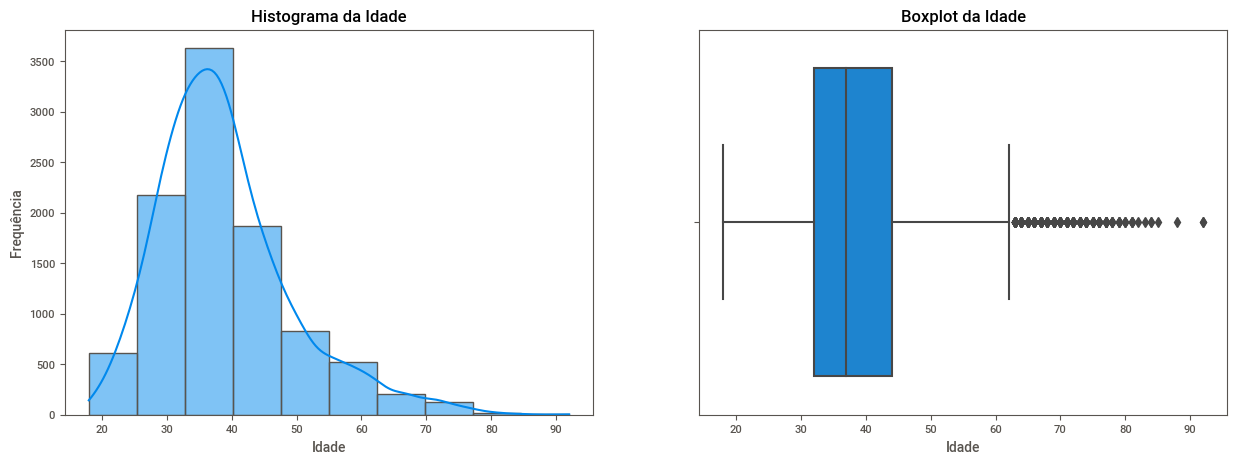

In [ ]:
#Histograma e Boxplot Idade

plt.figure(figsize=(15, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Idade', kde=True, bins=10)
plt.title('Histograma da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Idade')
plt.title('Boxplot da Idade')
plt.xlabel('Idade')

plt.show()


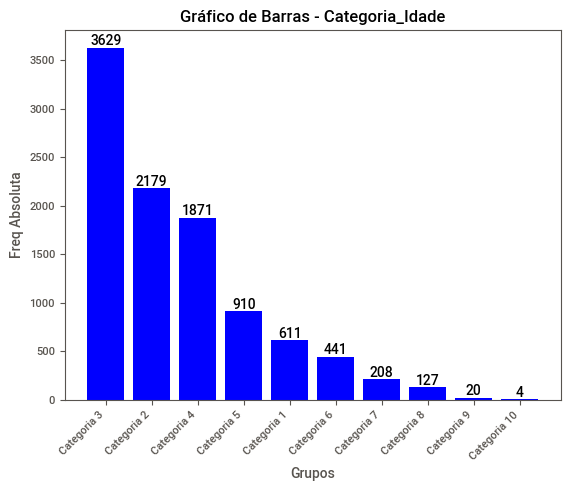

In [ ]:
plotar_grafico_barras(df= df_idade, variavel= 'Categoria_Idade', frequencia_absoluta= 'Frequência Absoluta')

<ipython-input-9-e6ad18514daa>:56: UserWarning: FixedFormatter should only be used together with FixedLocator


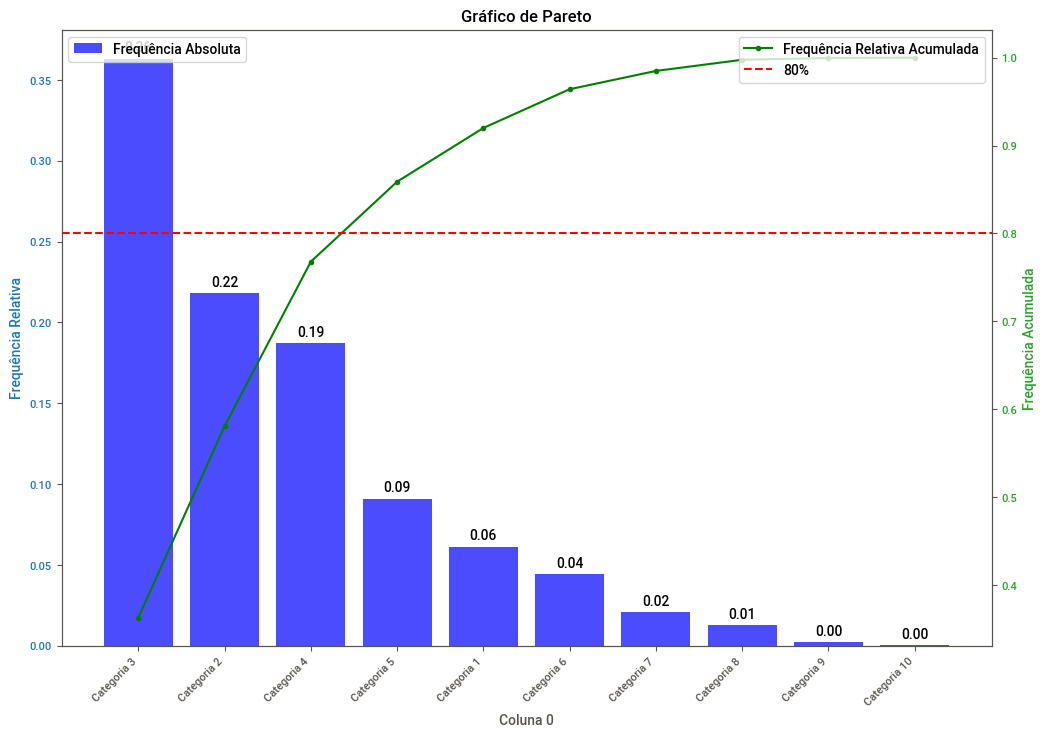

In [ ]:
plotar_grafico_pareto(df_idade, 0, 2, 3)

In [ ]:
df_iv.get_bivariada(var_escolhida= 'Categoria_Idade')

==> "Categoria_Idade" tem IV de 0.7964


Churn?         Variavel     Var_Range  #Target_1  #Target_0  Total  %Freq  \
0       Categoria_Idade   Categoria 1         46        565    611   6.11   
1       Categoria_Idade   Categoria 2        165       2014   2179  21.79   
2       Categoria_Idade   Categoria 3        469       3160   3629  36.29   
3       Categoria_Idade   Categoria 4        555       1316   1871  18.71   
4       Categoria_Idade   Categoria 5        485        425    910   9.10   
5       Categoria_Idade   Categoria 6        220        221    441   4.41   
6       Categoria_Idade   Categoria 7         58        150    208   2.08   
7       Categoria_Idade   Categoria 8         14        113    127   1.27   
8       Categoria_Idade   Categoria 9          1         19     20   0.20   
9       Categoria_Idade  Categoria 10          0          4      4   0.04   

Churn?  %Target_1  %Target_0  %Taxa_de_Target_1    Odds  LN(Odds)      IV  
0          2.2851     7.0740             7.5286  0.3230   -1.1301  0.0541  
1          8.1967    25.2160             7.5723  0.3251   -1.1236  0.1912  
2         23.2986    39.5643            12.9237  0.5889   -0.5295  0.0861  
3         27.5708    16.4768            29.6633  1.6733    0.5148  0.0571  
4         24.0934     5.3211            53.2967  4.5279    1.5103  0.2835  
5         10.9290     2.7670            49.8866  3.9498    1.3737  0.1121  
6          2.8813     1.8781            27.8846  1.5342    0.4280  0.0043  
7          0.6955     1.4148            11.0236  0.4916   -0.7101  0.0051  
8          0.0497     0.2379             5.0000  0.2089   -1.5659  0.0029  
9          0.0000     0.0501             0.0000  0.0100   -4.6052  0.0000

### **Insights Categoria_Idade**



**Frequências:**

**Distribuição da Idade:**
A maioria das observações está concentrada nas categorias de idade intermediárias, especialmente na Categoria 3, que representa 36.29% das observações. Isso sugere que a faixa etária mais comum entre os clientes é provavelmente entre 34 e 42 anos.

**Tendência Crescente:**
A frequência relativa das categorias parece seguir uma tendência crescente até a Categoria 5 e, em seguida, diminui nas categorias mais avançadas. Isso pode indicar que a quantidade de clientes diminui à medida que a idade aumenta, o que é uma tendência esperada em muitos casos.

**Concentração nas Primeiras Categorias:**
As primeiras cinco categorias (1 a 5) abrangem 92% das observações, sugerindo que a maioria dos clientes está concentrada em faixas etárias mais jovens e intermediárias.

**Baixa Representatividade nas Últimas Categorias:**
As últimas categorias (6 a 10) representam uma proporção menor das observações, indicando uma menor representatividade de clientes mais velhos na amostra.

**Potencial para Segmentação:**
A distribuição das idades em diferentes categorias pode fornecer insights úteis para estratégias de segmentação de clientes. Por exemplo, a empresa pode personalizar suas ofertas ou campanhas com base nas características específicas de cada faixa etária.

**Insighs da %Taxa de Churn, Odds e IV**

**Impacto da Idade no Churn:**
A categoria de idade parece ter uma influência significativa no churn, com taxas de churn variando consideravelmente entre as diferentes faixas etárias. Por exemplo, observa-se que as taxas de churn são mais altas nas categorias de idade intermediárias (3, 4 e 5), enquanto são mais baixas nas categorias mais jovens e mais velhas.

**Padrões de Comportamento de Churn:**
As categorias de idade com taxas de churn mais altas podem indicar padrões de comportamento específicos em determinadas faixas etárias. Isso pode ser útil para identificar grupos de clientes que têm maior probabilidade de churn e desenvolver estratégias de retenção direcionadas a esses grupos.

**Importância da Variável de Idade:**
O IV (Information Value) alto para a variável "Categoria_Idade" sugere que essa variável é altamente informativa na previsão do churn. Isso significa que a idade dos clientes é um fator relevante a ser considerado ao desenvolver modelos de previsão de churn.

**Variação na Propensão ao Churn:**
A variação nas Odds entre as categorias de idade indica que a propensão ao churn varia substancialmente entre os grupos etários. Isso pode ser resultado de diferentes comportamentos, necessidades ou expectativas dos clientes em diferentes estágios da vida.

**Segmentação de Clientes:**
Os dados fornecem insights valiosos para segmentar os clientes com base em sua faixa etária e adaptar estratégias de retenção e marketing de acordo com as características específicas de cada grupo. Isso pode ajudar a maximizar a eficácia das iniciativas de retenção e melhorar a satisfação do cliente.

## **Variável Qtd_Categorias**

Qte de categorias de produtos (ex: lanches, comida japonesa, doces etc) pedidos nos ultimos 3 meses anteriores à data de extração.

In [ ]:
#Cria um data frame da coluna "Qte_Categorias"com a frequência absoluta, relativa e acumulada.
df_qte_categorias = frequencias(df, 'Qte_Categorias')
df_qte_categorias

Qte_Categorias Frequência Absoluta  Frequência Relativa  \
0              1                5084               0.5084   
1              2                4590               0.4590   
2              3                 266               0.0266   
3              4                  60               0.0060   

   Frequência Acumulada  
0                0.5084  
1                0.9674  
2                0.9940  
3                1.0000

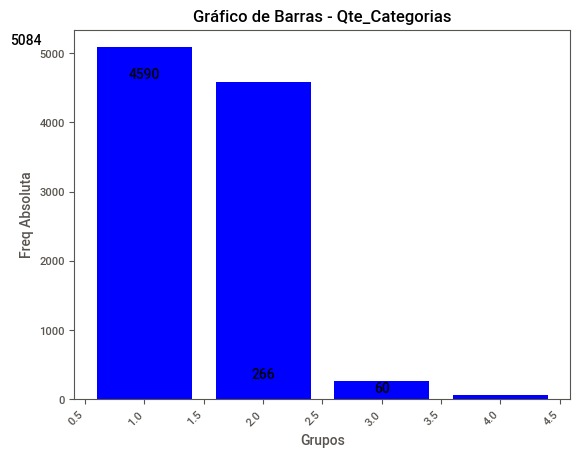

In [ ]:
plotar_grafico_barras(df= df_qte_categorias, variavel= 'Qte_Categorias', frequencia_absoluta='Frequência Absoluta')

<ipython-input-9-e6ad18514daa>:56: UserWarning: FixedFormatter should only be used together with FixedLocator


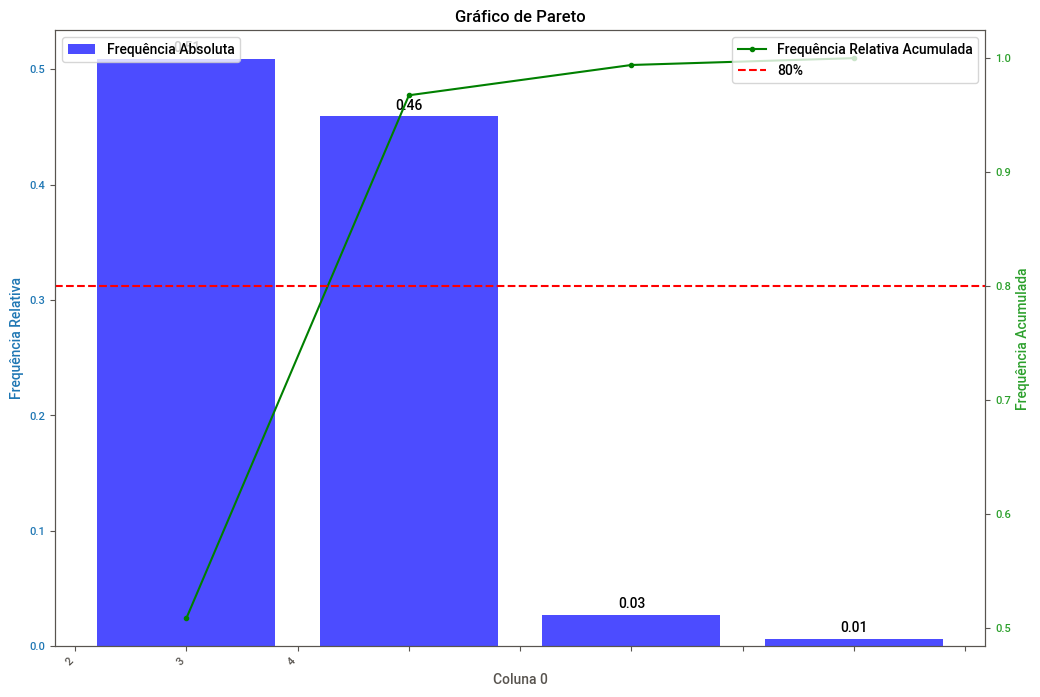

In [ ]:
#Grafico de Pareto
plotar_grafico_pareto(df_qte_categorias, 0, 2, 3)

In [ ]:
#Análise IV
df_iv.get_bivariada('Qte_Categorias')

==> "Qte_Categorias" tem IV de 0.4172


Churn?        Variavel    Var_Range  #Target_1  #Target_0  Total  %Freq  \
0       Qte_Categorias  (0.99, 2.0]       1738       7936   9674  96.74   
1       Qte_Categorias   (2.0, 4.0]        275         51    326   3.26   

Churn?  %Target_1  %Target_0  %Taxa_de_Target_1     Odds  LN(Odds)      IV  
0         86.3388    99.3615            17.9657   0.8689   -0.1405  0.0183  
1         13.6612     0.6385            84.3558  21.3958    3.0632  0.3989

### **Insigths Qtd_Categorias**

**Frequências:**

**Frequência Absoluta e Relativa:**

* A maioria dos clientes (50.84%) está na categoria com 1 categoria.
* Em seguida, 45.90% dos clientes têm 2 categorias.
* Uma parcela muito pequena dos clientes tem 3 categorias (2.66%), e ainda menos têm 4 categorias (0.60%).
* A maior parte da distribuição de frequência está concentrada nas categorias 1 e 2.

**Frequência Acumulada:**

* A frequência acumulada mostra como as frequências individuais somam ao longo dos valores da variável.
* Cerca de 50.84% dos clientes têm 1 ou menos categorias.
A grande maioria dos clientes (96.74%) tem 2 ou menos categorias.
* Quase todos os clientes (99.40%) têm 3 ou menos categorias.
* Todos os clientes (100%) têm 4 ou menos categorias.

Esses insights indicam que a maioria dos clientes tem poucas categorias, com a distribuição de frequência diminuindo rapidamente à medida que o número de categorias aumenta. Isso sugere que a quantidade de categorias é uma variável com alta concentração em valores menores, o que pode ter implicações na análise e modelagem dos dados.

**Insights ODDS e Information Value (IV)**

**Intervalo (0.99, 2.0]**

Odds: 0.8689
Soma do IV: 0.0183

**Insights:**

* Este intervalo representa clientes com uma quantidade de categorias específicas entre 0.99 e 2.0.
* A probabilidade de churn é de 86.34%, indicando que a maioria dos clientes nesse intervalo está propensa a churn.
* A odds de churn é 0.8689, o que sugere que as chances de churn são menores do que as chances de não churn.
* O IV é 0.0183, indicando um baixo poder preditivo para a variável "Qte_Categorias" neste intervalo.

**Intervalo (2.0, 4.0]**

Odds: 3.0632
Soma do IV: 0.3989

**Insights:**

* Este intervalo representa clientes com uma quantidade de categorias específicas entre 2.0 e 4.0.
* A probabilidade de churn é de 13.66%, sugerindo que uma proporção menor de clientes nesse intervalo está propensa a churn.
* A odds de churn é 3.0632, indicando que as chances de churn são significativamente maiores do que as chances de não churn.
* O IV é 0.3989, indicando um poder preditivo mais forte para a variável "Qte_Categorias" neste intervalo em comparação com o primeiro.

Esses insights sugerem que a quantidade de categorias específicas tem uma relação diferente com a probabilidade de churn em diferentes intervalos de valores. Enquanto para o primeiro intervalo a variável parece ter um poder preditivo mais fraco, para o segundo intervalo ela parece ser mais significativa na predição do churn.

## **Variável Estado**

Estado do Cliente

In [ ]:
#Cria um data frame da coluna "P 03: Qual a sua escolaridade?"com a frequência absoluta, relativa e acumulada.
df_estado = frequencias(df, 'Estado')
df_estado

Estado Frequência Absoluta  Frequência Relativa  \
0       São Paulo                5014               0.5014   
1    Minas Gerais                2509               0.2509   
2  Rio de Janeiro                2477               0.2477   

   Frequência Acumulada  
0                0.5014  
1                0.7523  
2                1.0000

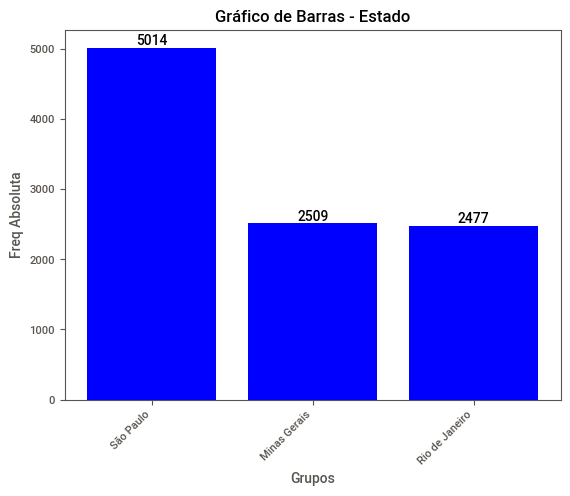

In [ ]:
plotar_grafico_barras(df= df_estado, variavel= 'Estado', frequencia_absoluta= 'Frequência Absoluta')

<ipython-input-9-e6ad18514daa>:56: UserWarning: FixedFormatter should only be used together with FixedLocator


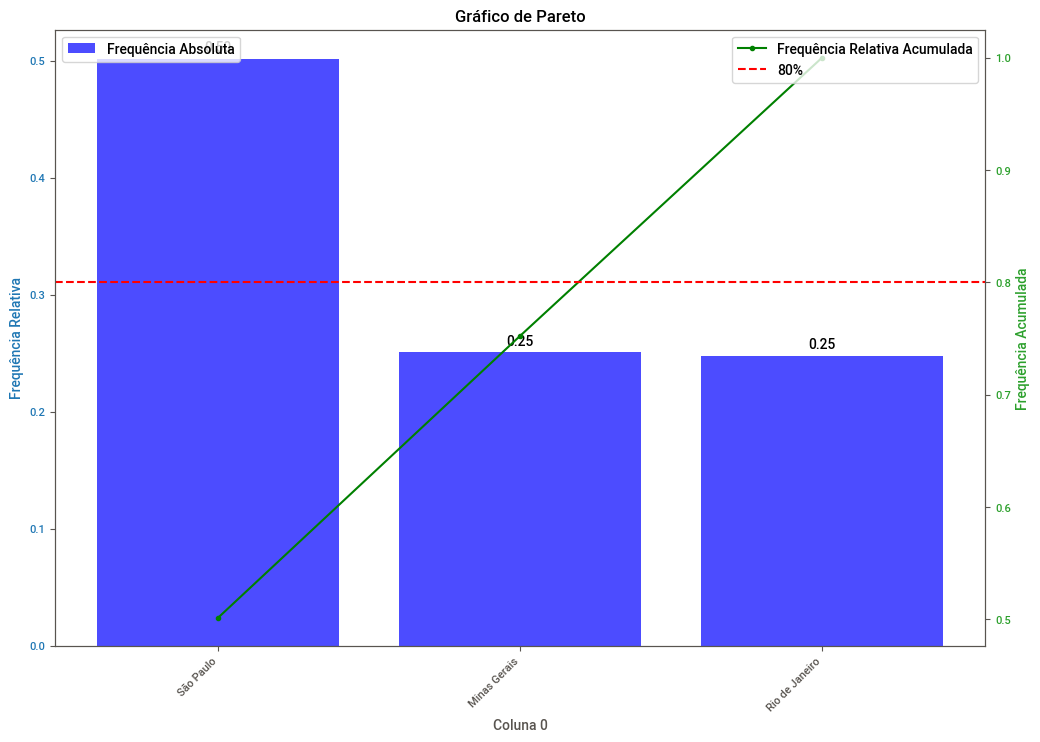

In [ ]:
#Gráfico de Pareto
plotar_grafico_pareto(df_estado, 0, 2,3)

In [ ]:
#Análise IV
df_iv.get_bivariada('Estado')

==> "Estado" tem IV de 0.1668


Churn? Variavel       Var_Range  #Target_1  #Target_0  Total  %Freq  \
0        Estado    Minas Gerais        804       1705   2509  25.09   
1        Estado  Rio de Janeiro        407       2070   2477  24.77   
2        Estado       São Paulo        802       4212   5014  50.14   

Churn?  %Target_1  %Target_0  %Taxa_de_Target_1    Odds  LN(Odds)      IV  
0         39.9404    21.3472            32.0446  1.8710    0.6265  0.1165  
1         20.2186    25.9171            16.4312  0.7801   -0.2483  0.0141  
2         39.8410    52.7357            15.9952  0.7555   -0.2804  0.0362

### **Insights Estado**

**Frequências**

**Frequência Absoluta e Relativa:**
* A maioria dos clientes (50.14%) é de São Paulo.
* Minas Gerais representa 25.09% dos clientes.
* O Rio de Janeiro representa 24.77% dos clientes.
* A distribuição de clientes entre os estados mostra uma concentração significativa em São Paulo, seguido por uma proporção menor em Minas Gerais e Rio de Janeiro.

**Frequência Acumulada:**

* A frequência acumulada mostra como as frequências individuais somam ao longo dos estados.
* Cerca de 75.23% dos clientes estão em São Paulo ou em Minas Gerais.
* Todos os estados juntos representam 100% dos clientes.
* Essa distribuição destaca a predominância de clientes em São Paulo, seguida por Minas Gerais e Rio de Janeiro.

Esses insights sugerem uma disparidade na distribuição de clientes entre os estados, com São Paulo liderando significativamente em número de clientes, seguido por Minas Gerais e, por último, o Rio de Janeiro. Essa discrepância na distribuição pode ter implicações importantes em estratégias de marketing, atendimento ao cliente e análise de churn, uma vez que as condições de mercado e o comportamento do cliente podem variar entre regiões geográficas.




**Insights ODDS e IV**

***Estado: Minas Gerais, Odds: 1.8710 e Soma do IV: 0.1165***

**Insights:**

* Minas Gerais tem uma taxa de churn de 39.94%, indicando que cerca de 40% dos clientes desse estado estão propensos a churn.
* A odds de churn é 1.8710, o que sugere que as chances de churn são quase duas vezes maiores do que as chances de não churn em Minas Gerais.
* O IV é 0.1165, indicando um poder preditivo moderado para a variável "Estado" quando se trata de Minas Gerais.

***Estado: Rio de Janeiro, Odds: 0.7801 e Soma do IV: 0.0141***

**Insights:**

* O Rio de Janeiro tem uma taxa de churn de 20.22%, indicando que cerca de 20% dos clientes desse estado estão propensos a churn.
* A odds de churn é 0.7801, o que sugere que as chances de churn são menores do que as chances de não churn no Rio de Janeiro.
* O IV é 0.0141, indicando um poder preditivo relativamente baixo para a variável "Estado" quando se trata do Rio de Janeiro.

***Estado: São Paulo, Odds: 0.7555 e Soma do IV: 0.0362***

**Insights:**

* São Paulo tem uma taxa de churn de 39.84%, indicando que cerca de 40% dos clientes desse estado estão propensos a churn.
* A odds de churn é 0.7555, o que sugere que as chances de churn são menores do que as chances de não churn em São Paulo.
* O IV é 0.0362, indicando um poder preditivo moderado para a variável "Estado" quando se trata de São Paulo.

Esses insights destacam como a probabilidade de churn e o poder preditivo variam entre diferentes estados. Enquanto Minas Gerais e São Paulo mostram taxas de churn semelhantes e um poder preditivo moderado, o Rio de Janeiro tem uma taxa de churn menor e um poder preditivo mais fraco. Isso pode indicar diferenças significativas nos comportamentos dos clientes e nas condições de mercado entre esses estados.

## **Variável Limite_Credito_Mercado**

Limite de Crédito que o cliente tem no mercado. A empresa comprou essa variável de um Bureau de Crédito. Quanto maior é o limite, maior é a chance do cliente ter um bom poder aquisitivo.

In [ ]:
#Cria um data frame da coluna "P 04: Qual seu conhecimento em inglês?"com a frequência absoluta, relativa e acumulada.
df_lcm = frequencias(df, 'Categoria_lcm')
df_lcm

Categoria_lcm Frequência Absoluta  Frequência Relativa  Frequência Acumulada
0   Faixa_lcm 1                3623               0.3623                0.3623
1   Faixa_lcm 5                2077               0.2077                0.5700
2   Faixa_lcm 6                1748               0.1748                0.7448
3   Faixa_lcm 4                1175               0.1175                0.8623
4   Faixa_lcm 7                 732               0.0732                0.9355
5   Faixa_lcm 3                 357               0.0357                0.9712
6   Faixa_lcm 8                 187               0.0187                0.9899
7   Faixa_lcm 2                  69               0.0069                0.9968
8   Faixa_lcm 9                  30               0.0030                0.9998
9  Faixa_lcm 10                   1               0.0001                0.9999

**Legenda das Faixas de Crédito:**

* **Faixa 1:** De 0 a 250
* **Faixa 2:** De 251 a 500
* **Faixa 3:** De 501 a 750
* **Faixa 4:** De 751 a 1000
* **Faixa 5:** De 1001 a 1250
* **Faixa 6:** De 1251 a 1500
* **Faixa 7:** De 1501 a 1750
* **Faixa 8:** De 1751 a 2000
* **Faixa 9:** De 2001 a 2250
* **Faixa 10:** De 2251 a 2500

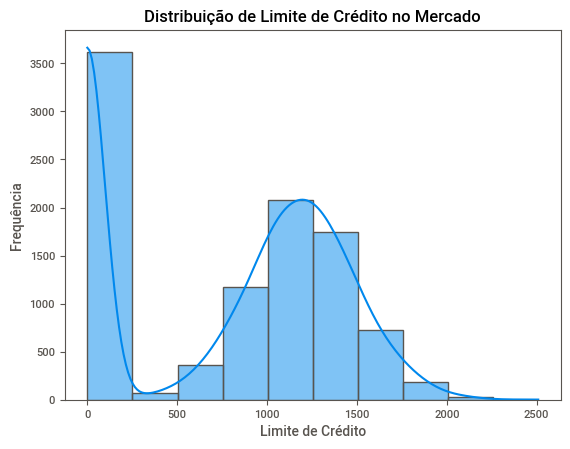

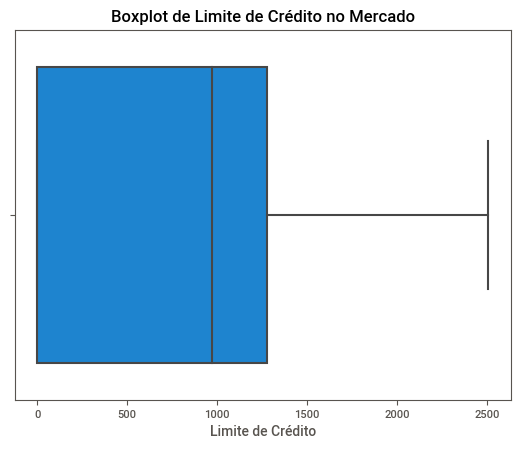

A média do limite de crédito no mercado é de 764.8588928799998
A mediana do limite de crédito no mercado é de 971.9854
O desvio padrão do limite de crédito no mercado é de 623.9740520238594
O valor mínimo de limite de crédito no mercado é de 0.0
O valor máximo de limite de crédito no mercado é de 2508.9809
Existem 0 outliers na variável limite de crédito no mercado


In [ ]:
# Estatísticas descritivas da variável Limite_Credito_Mercado
df['Limite_Credito_Mercado'].describe()

# Média
media = df['Limite_Credito_Mercado'].mean()

# Mediana
mediana = df['Limite_Credito_Mercado'].median()

# Desvio padrão
desvio_padrao = df['Limite_Credito_Mercado'].std()

# Mínimo
minimo = df['Limite_Credito_Mercado'].min()

# Máximo
maximo = df['Limite_Credito_Mercado'].max()

# Distribuição de frequência
df['Limite_Credito_Mercado'].value_counts()

# Gráfico de distribuição
sns.histplot(data=df, x='Limite_Credito_Mercado', kde=True, bins=10)
plt.title('Distribuição de Limite de Crédito no Mercado')
plt.xlabel('Limite de Crédito')
plt.ylabel('Frequência')
plt.show()

# Boxplot
sns.boxplot(data=df, x='Limite_Credito_Mercado')
plt.title('Boxplot de Limite de Crédito no Mercado')
plt.xlabel('Limite de Crédito')
plt.show()

# Análise de outliers
outliers = df[df['Limite_Credito_Mercado'] > (media + 3 * desvio_padrao)]

# Interpretação dos resultados
print("A média do limite de crédito no mercado é de", media)
print("A mediana do limite de crédito no mercado é de", mediana)
print("O desvio padrão do limite de crédito no mercado é de", desvio_padrao)
print("O valor mínimo de limite de crédito no mercado é de", minimo)
print("O valor máximo de limite de crédito no mercado é de", maximo)
print("Existem", len(outliers), "outliers na variável limite de crédito no mercado")



<ipython-input-9-e6ad18514daa>:56: UserWarning: FixedFormatter should only be used together with FixedLocator


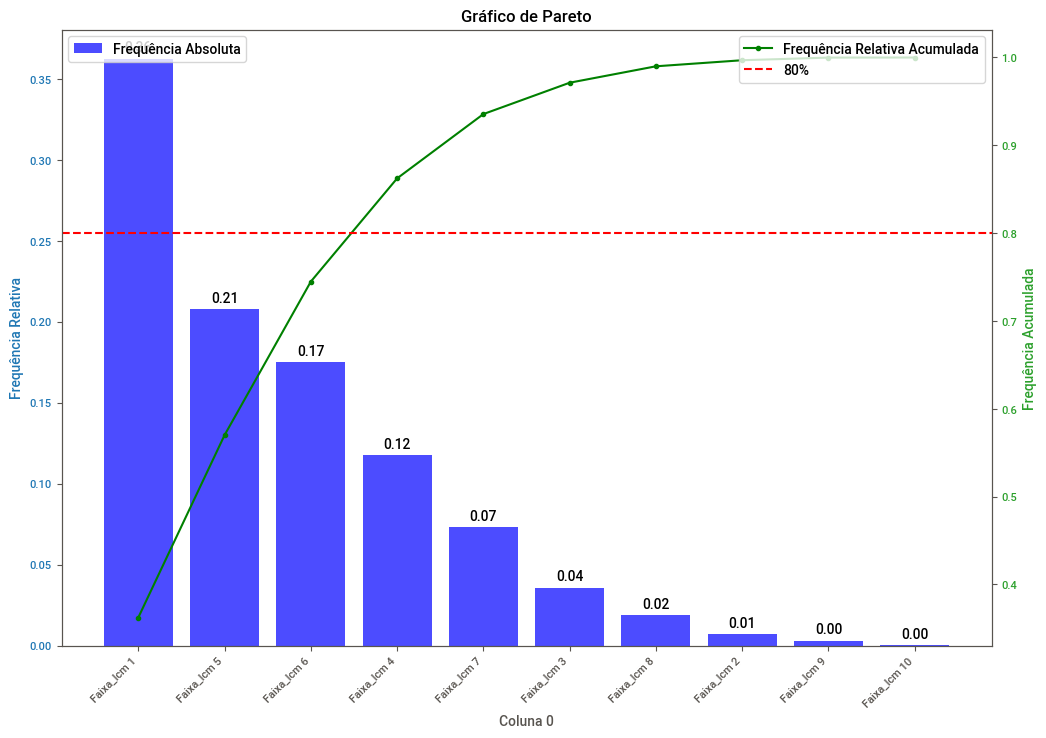

In [ ]:
#Gráfico de Pareto
plotar_grafico_pareto(df_lcm, 0, 2, 3)

In [ ]:
#Análise IV
df_iv.get_bivariada('Categoria_lcm')

==> "Categoria_lcm" tem IV de 0.1218


Churn?       Variavel     Var_Range  #Target_1  #Target_0  Total    %Freq  \
0       Categoria_lcm   Faixa_lcm 1        500       3123   3623  36.2336   
1       Categoria_lcm   Faixa_lcm 2         21         48     69   0.6901   
2       Categoria_lcm   Faixa_lcm 3         80        277    357   3.5704   
3       Categoria_lcm   Faixa_lcm 4        222        953   1175  11.7512   
4       Categoria_lcm   Faixa_lcm 5        553       1524   2077  20.7721   
5       Categoria_lcm   Faixa_lcm 6        421       1327   1748  17.4817   
6       Categoria_lcm   Faixa_lcm 7        153        579    732   7.3207   
7       Categoria_lcm   Faixa_lcm 8         44        143    187   1.8702   
8       Categoria_lcm   Faixa_lcm 9         17         13     30   0.3000   
9       Categoria_lcm  Faixa_lcm 10          1          0      1   0.0100   

Churn?  %Target_1  %Target_0  %Taxa_de_Target_1    Odds  LN(Odds)      IV  
0         24.8509    39.1010            13.8007  0.6356   -0.4532  0.0646  
1          1.0437     0.6010            30.4348  1.7366    0.5519  0.0024  
2          3.9761     3.4681            22.4090  1.1465    0.1367  0.0007  
3         11.0338    11.9319            18.8936  0.9247   -0.0783  0.0007  
4         27.4851    19.0810            26.6249  1.4404    0.3649  0.0307  
5         20.9245    16.6145            24.0847  1.2594    0.2306  0.0099  
6          7.6044     7.2493            20.9016  1.0490    0.0478  0.0002  
7          2.1869     1.7904            23.5294  1.2215    0.2001  0.0008  
8          0.8449     0.1628            56.6667  5.1898    1.6467  0.0112  
9          0.0497     0.0100           100.0000  4.9700    1.6034  0.0006

### **Insights Limite_Credito_Mercado**



**Frequências**

**Faixa_lcm 1:**
* Frequência Absoluta: 3623
* Frequência Relativa: 36.23%
* Frequência Acumulada: 36.23%
* Esta é a faixa com a maior frequência absoluta e relativa, representando mais de um terço (36.23%) dos clientes.

**Faixas intermediárias (Faixa_lcm 5, 6, 4, 7 e 3):**

* As faixas de limite de crédito entre a Faixa_lcm 5 e a Faixa_lcm 3 têm frequências absolutas e relativas significativas, variando de 20.77% a 3.57%.
* Em conjunto, essas faixas intermediárias compreendem a maior parte (aproximadamente 63.34%) dos clientes.

**Faixas menos frequentes (Faixa_lcm 8, 2, 9 e 10):**
* As faixas de limite de crédito menos frequentes (Faixa_lcm 8, 2, 9 e 10) têm frequências absolutas e relativas menores, variando de 0.30% a 0.0001%.
* Em conjunto, essas faixas menos frequentes representam menos de 1% (aproximadamente 0.10%) dos clientes.



**ODDS**

**Faixa_lcm 1 (0-250):**
* Odds: 0.6356
* Probabilidade de churn: Cerca de 25%
* A odds de churn é menor do que a de não churn.

**Faixa_lcm 2 (251-500):**
* Odds: 1.7366
* Probabilidade de churn: Cerca de 1%
* A odds de churn é maior do que a de não churn.

**Faixas restantes:**
* As odds de churn e as probabilidades variam entre as faixas.
* Algumas faixas têm odds de churn maiores do que as de não churn, enquanto outras têm odds menores.
* A probabilidade de churn varia consideravelmente entre as faixas, desde menos de 1% até mais de 25%.
* O poder preditivo das faixas também varia, com algumas faixas apresentando IVs mais altos do que outras.

Esses insights resumidos destacam a variação nas odds de churn entre as diferentes faixas de limite de crédito. Essa variação sugere que o limite de crédito é um indicador significativo para prever o churn, com diferentes faixas mostrando diferentes níveis de risco de churn.Boa_Performance

## **Variável Gênero**

Genero do cliente

In [ ]:
#Cria um data frame da coluna "P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?"com a frequência absoluta, relativa e acumulada.
df_genero = frequencias(df, 'Gênero')
df_genero

Gênero Frequência Absoluta  Frequência Relativa  Frequência Acumulada
0  Masculino                5457               0.5457                0.5457
1   Feminino                4543               0.4543                1.0000

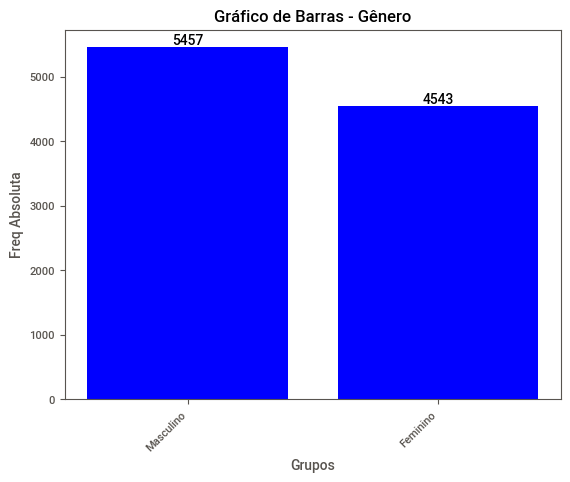

In [ ]:
plotar_grafico_barras(df= df_genero, variavel= 'Gênero', frequencia_absoluta= 'Frequência Absoluta')

In [ ]:
df_iv.get_bivariada('Gênero')

==> "Gênero" tem IV de 0.073


Churn? Variavel  Var_Range  #Target_1  #Target_0  Total  %Freq  %Target_1  \
0        Gênero   Feminino       1131       3412   4543  45.43    56.1848   
1        Gênero  Masculino        882       4575   5457  54.57    43.8152   

Churn?  %Target_0  %Taxa_de_Target_1    Odds  LN(Odds)      IV  
0         42.7194            24.8954  1.3152     0.274  0.0369  
1         57.2806            16.1627  0.7649    -0.268  0.0361

### **Insights Gênero**

**Frequência**

**Gênero: Masculino:**

* Frequência Absoluta: 5457
* Frequência Relativa: 54.57%
* Frequência Acumulada: 54.57%
Os clientes do sexo masculino são maioria no conjunto de dados, representando mais da metade (54.57%) do total de clientes.

**Gênero: Feminino:**

* Frequência Absoluta: 4543
* Frequência Relativa: 45.43%
* Frequência Acumulada: 100.00%
* As clientes do sexo feminino representam aproximadamente 45.43% do total de clientes.

Esses insights mostram uma distribuição relativamente equilibrada entre os gêneros, com uma leve maioria de clientes do sexo masculino. Isso sugere que o conjunto de dados é razoavelmente representativo em termos de gênero, o que pode ser importante ao considerar análises e decisões relacionadas ao gênero dos clientes.

**Insights ODDs e IV**

* **Gênero: Feminino:**
* **Odds: 1.3152**
* **IV: 0.0369**

Insights:
* As clientes do sexo feminino representam 45.43% dos dados.
* A taxa de churn para o sexo feminino é de aproximadamente 24.90%, o que indica que cerca de 25% das clientes femininas estão propensas a churn.
* A odds de churn é 1.3152, o que sugere que as chances de churn são maiores do que as chances de não churn para o sexo feminino.
* O IV é 0.0369, indicando que o gênero tem um poder preditivo moderado na previsão do churn.

**Gênero: Masculino:**
**Odds: 0.7649**
**IV: 0.0361**

Insights:
* Os clientes do sexo masculino representam 54.57% dos dados.
A taxa de churn para o sexo masculino é de aproximadamente 16.16%, o que indica que cerca de 16% dos clientes masculinos estão propensos a churn.
* A odds de churn é 0.7649, o que sugere que as chances de churn são menores do que as chances de não churn para o sexo masculino.
* O IV é 0.0361, indicando que o gênero tem um poder preditivo moderado na previsão do churn.

Esses insights sugerem que o gênero tem algum impacto na probabilidade de churn, com clientes do sexo feminino tendo uma probabilidade de churn ligeiramente maior do que clientes do sexo masculino. No entanto, o poder preditivo do gênero é moderado, com IVs semelhantes para ambos os gêneros. Isso indica que, embora o gênero possa ser útil na previsão do churn, outros fatores também desempenham um papel importante.

# **Desenvolvendo Modelos**


Neste exemplo utilizaremos a biblioteca Scikit Learn, uma das mais utilizadas para o desenvolvimento de modelos de Machine Learning.

### **Criação Variáveis Dummies**


A criação de variáveis dummy é um processo usado para converter variáveis categóricas em um formato numérico que pode ser usado em modelos de aprendizado de máquina. Cada categoria da variável original é representada por uma nova variável binária, onde 1 indica a presença da categoria e 0 indica a ausência. Isso permite que modelos que requerem entradas numéricas trabalhem com variáveis categóricas, facilitando a análise e previsão de dados.

In [ ]:
df.columns

Index(['ClientId', 'DataExtracao', 'Score_Credito', 'Estado', 'Gênero',
       'Idade', 'Tempo_Cliente', 'Limite_Credito_Mercado', 'Qte_Categorias',
       'Usa_Cartao_Credito', 'Programa_Fidelidade', 'Sum_Pedidos_Acumulados',
       'DataUltimaTransacao', 'Churn?', 'Categoria_Idade', 'Categoria_lcm'],
      dtype='object')

In [ ]:
#Dropando Variáveis que tiverem baixo IV

df = df.drop(columns=['ClientId', 'Tempo_Cliente', 'Idade', 'DataExtracao', 'Score_Credito', 'Usa_Cartao_Credito', 'Programa_Fidelidade', 'Sum_Pedidos_Acumulados', 'DataUltimaTransacao', 'Limite_Credito_Mercado'])
df

Estado     Gênero  Qte_Categorias  Churn? Categoria_Idade  \
0          São Paulo   Feminino               1       1     Categoria 4   
1     Rio de Janeiro   Feminino               1       0     Categoria 4   
2          São Paulo   Feminino               3       1     Categoria 4   
3          São Paulo   Feminino               2       0     Categoria 3   
4     Rio de Janeiro   Feminino               1       0     Categoria 4   
...              ...        ...             ...     ...             ...   
9995       São Paulo  Masculino               2       0     Categoria 3   
9996       São Paulo  Masculino               1       0     Categoria 3   
9997       São Paulo   Feminino               1       1     Categoria 3   
9998    Minas Gerais  Masculino               2       1     Categoria 4   
9999       São Paulo   Feminino               1       0     Categoria 2   

     Categoria_lcm  
0      Faixa_lcm 1  
1      Faixa_lcm 4  
2      Faixa_lcm 7  
3      Faixa_lcm 1  
4      Faixa_lcm 6  
...            ...  
9995   Faixa_lcm 1  
9996   Faixa_lcm 3  
9997   Faixa_lcm 1  
9998   Faixa_lcm 3  
9999   Faixa_lcm 6  

[10000 rows x 6 columns]

In [ ]:
#criando data frame modelo com variáveis dummies
df_modelo = pd.get_dummies(df, drop_first=True, dtype=int)
df_modelo.head()

Qte_Categorias  Churn?  Estado_Rio de Janeiro  Estado_São Paulo  \
0               1       1                      0                 1   
1               1       0                      1                 0   
2               3       1                      0                 1   
3               2       0                      0                 1   
4               1       0                      1                 0   

   Gênero_Masculino  Categoria_Idade_Categoria 2  Categoria_Idade_Categoria 3  \
0                 0                            0                            0   
1                 0                            0                            0   
2                 0                            0                            0   
3                 0                            0                            1   
4                 0                            0                            0   

   Categoria_Idade_Categoria 4  Categoria_Idade_Categoria 5  \
0                            1                            0   
1                            1                            0   
2                            1                            0   
3                            0                            0   
4                            1                            0   

   Categoria_Idade_Categoria 6  ...  Categoria_Idade_Categoria 10  \
0                            0  ...                             0   
1                            0  ...                             0   
2                            0  ...                             0   
3                            0  ...                             0   
4                            0  ...                             0   

   Categoria_lcm_Faixa_lcm 2  Categoria_lcm_Faixa_lcm 3  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   Categoria_lcm_Faixa_lcm 4  Categoria_lcm_Faixa_lcm 5  \
0                          0                          0   
1                          1                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   Categoria_lcm_Faixa_lcm 6  Categoria_lcm_Faixa_lcm 7  \
0                          0                          0   
1                          0                          0   
2                          0                          1   
3                          0                          0   
4                          1                          0   

   Categoria_lcm_Faixa_lcm 8  Categoria_lcm_Faixa_lcm 9  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   Categoria_lcm_Faixa_lcm 10  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 23 columns]

In [ ]:
#Target (Variável Resposta)
y = df_modelo['Churn?']

#Features (Variáveis Explicativas)
x = df_modelo.drop(['Churn?'], axis =1)

In [ ]:
#verificando y "Target"
y.shape

(10000,)

In [ ]:
#Verificando x "Variáveis Explicativas"
x

Qte_Categorias  Estado_Rio de Janeiro  Estado_São Paulo  \
0                  1                      0                 1   
1                  1                      1                 0   
2                  3                      0                 1   
3                  2                      0                 1   
4                  1                      1                 0   
...              ...                    ...               ...   
9995               2                      0                 1   
9996               1                      0                 1   
9997               1                      0                 1   
9998               2                      0                 0   
9999               1                      0                 1   

      Gênero_Masculino  Categoria_Idade_Categoria 2  \
0                    0                            0   
1                    0                            0   
2                    0                            0   
3                    0                            0   
4                    0                            0   
...                ...                          ...   
9995                 1                            0   
9996                 1                            0   
9997                 0                            0   
9998                 1                            0   
9999                 0                            1   

      Categoria_Idade_Categoria 3  Categoria_Idade_Categoria 4  \
0                               0                            1   
1                               0                            1   
2                               0                            1   
3                               1                            0   
4                               0                            1   
...                           ...                          ...   
9995                            1                            0   
9996                            1                            0   
9997                            1                            0   
9998                            0                            1   
9999                            0                            0   

      Categoria_Idade_Categoria 5  Categoria_Idade_Categoria 6  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   
...                           ...                          ...   
9995                            0                            0   
9996                            0                            0   
9997                            0                            0   
9998                            0                            0   
9999                            0                            0   

      Categoria_Idade_Categoria 7  ...  Categoria_Idade_Categoria 10  \
0                               0  ...                             0   
1                               0  ...                             0   
2                               0  ...                             0   
3                               0  ...                             0   
4                               0  ...                             0   
...                           ...  ...                           ...   
9995                            0  ...                             0   
9996                            0  ...                             0   
9997                            0  ...                             0   
9998                            0  ...                             0   
9999                            0  ...                             0   

      Categoria_lcm_Faixa_lcm 2  Categoria_lcm_Faixa_lcm 3  \
0                             0                    

### **Divisão das bases em Treino e Teste**


A divisão das bases em treino e teste é uma prática fundamental em aprendizado de máquina e estatística para avaliar a performance de modelos preditivos. Ao dividir os dados, geralmente em uma proporção como 70-30 ou 80-20, garantimos que o modelo seja treinado em uma parte dos dados e testado em outra parte independente, simulando assim seu desempenho em dados futuros não vistos. Isso ajuda a evitar a superestimação da performance do modelo e permite uma avaliação mais realista de sua capacidade de generalização para novos dados.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.30,
                                                    random_state=42)

## **Métodos de Ensemble:**

### **Bagging Regressão Logistica**

In [ ]:
# Inicia o estimador base para o Bagging
modelo_base = LogisticRegression(max_iter=1000)

# Quantidade de estimadores
num_estimadores = 100

# Classificador de Bagging
modelo_bagging = BaggingClassifier(base_estimator = modelo_base,
                                   n_estimators = num_estimadores,
                                   max_samples=0.5,
                                   max_features=0.5,
                                   random_state = 42)

# Ajuste do Modelo
modelo_bagging.fit(x_train,y_train)

# Métricas de Desempenho
calcula_desempenho(modelo_bagging, x_train, y_train, x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


Treino     Teste  Variação
Acurácia   0.797143  0.811000      0.02
AUROC      0.767107  0.761085     -0.01
KS         0.417948  0.418458      0.00
Precision  0.800000  0.866667      0.08
Recall     0.013937  0.022491      0.61
F1         0.027397  0.043845      0.60

### **Bagging Random Forest**

Melhor conjunto de hiperparâmetros:  {'max_depth': 5, 'min_samples_leaf': 25, 'n_estimators': 150, 'subsample': 0.4}


In [ ]:
modelo_rf = RandomForestClassifier(n_estimators=150,
                                   min_samples_leaf=25,
                                   max_depth=5,
                                   random_state = 42
                                   )
modelo_rf.fit(x_train, y_train)

# Métricas de Desempenho
calcula_desempenho(modelo_rf, x_train, y_train, x_test, y_test)

Treino     Teste  Variação
Acurácia   0.815857  0.828667      0.02
AUROC      0.819718  0.811934     -0.01
KS         0.499573  0.488884     -0.02
Precision  0.884211  0.872093     -0.01
Recall     0.117073  0.129758      0.11
F1         0.206769  0.225904      0.09

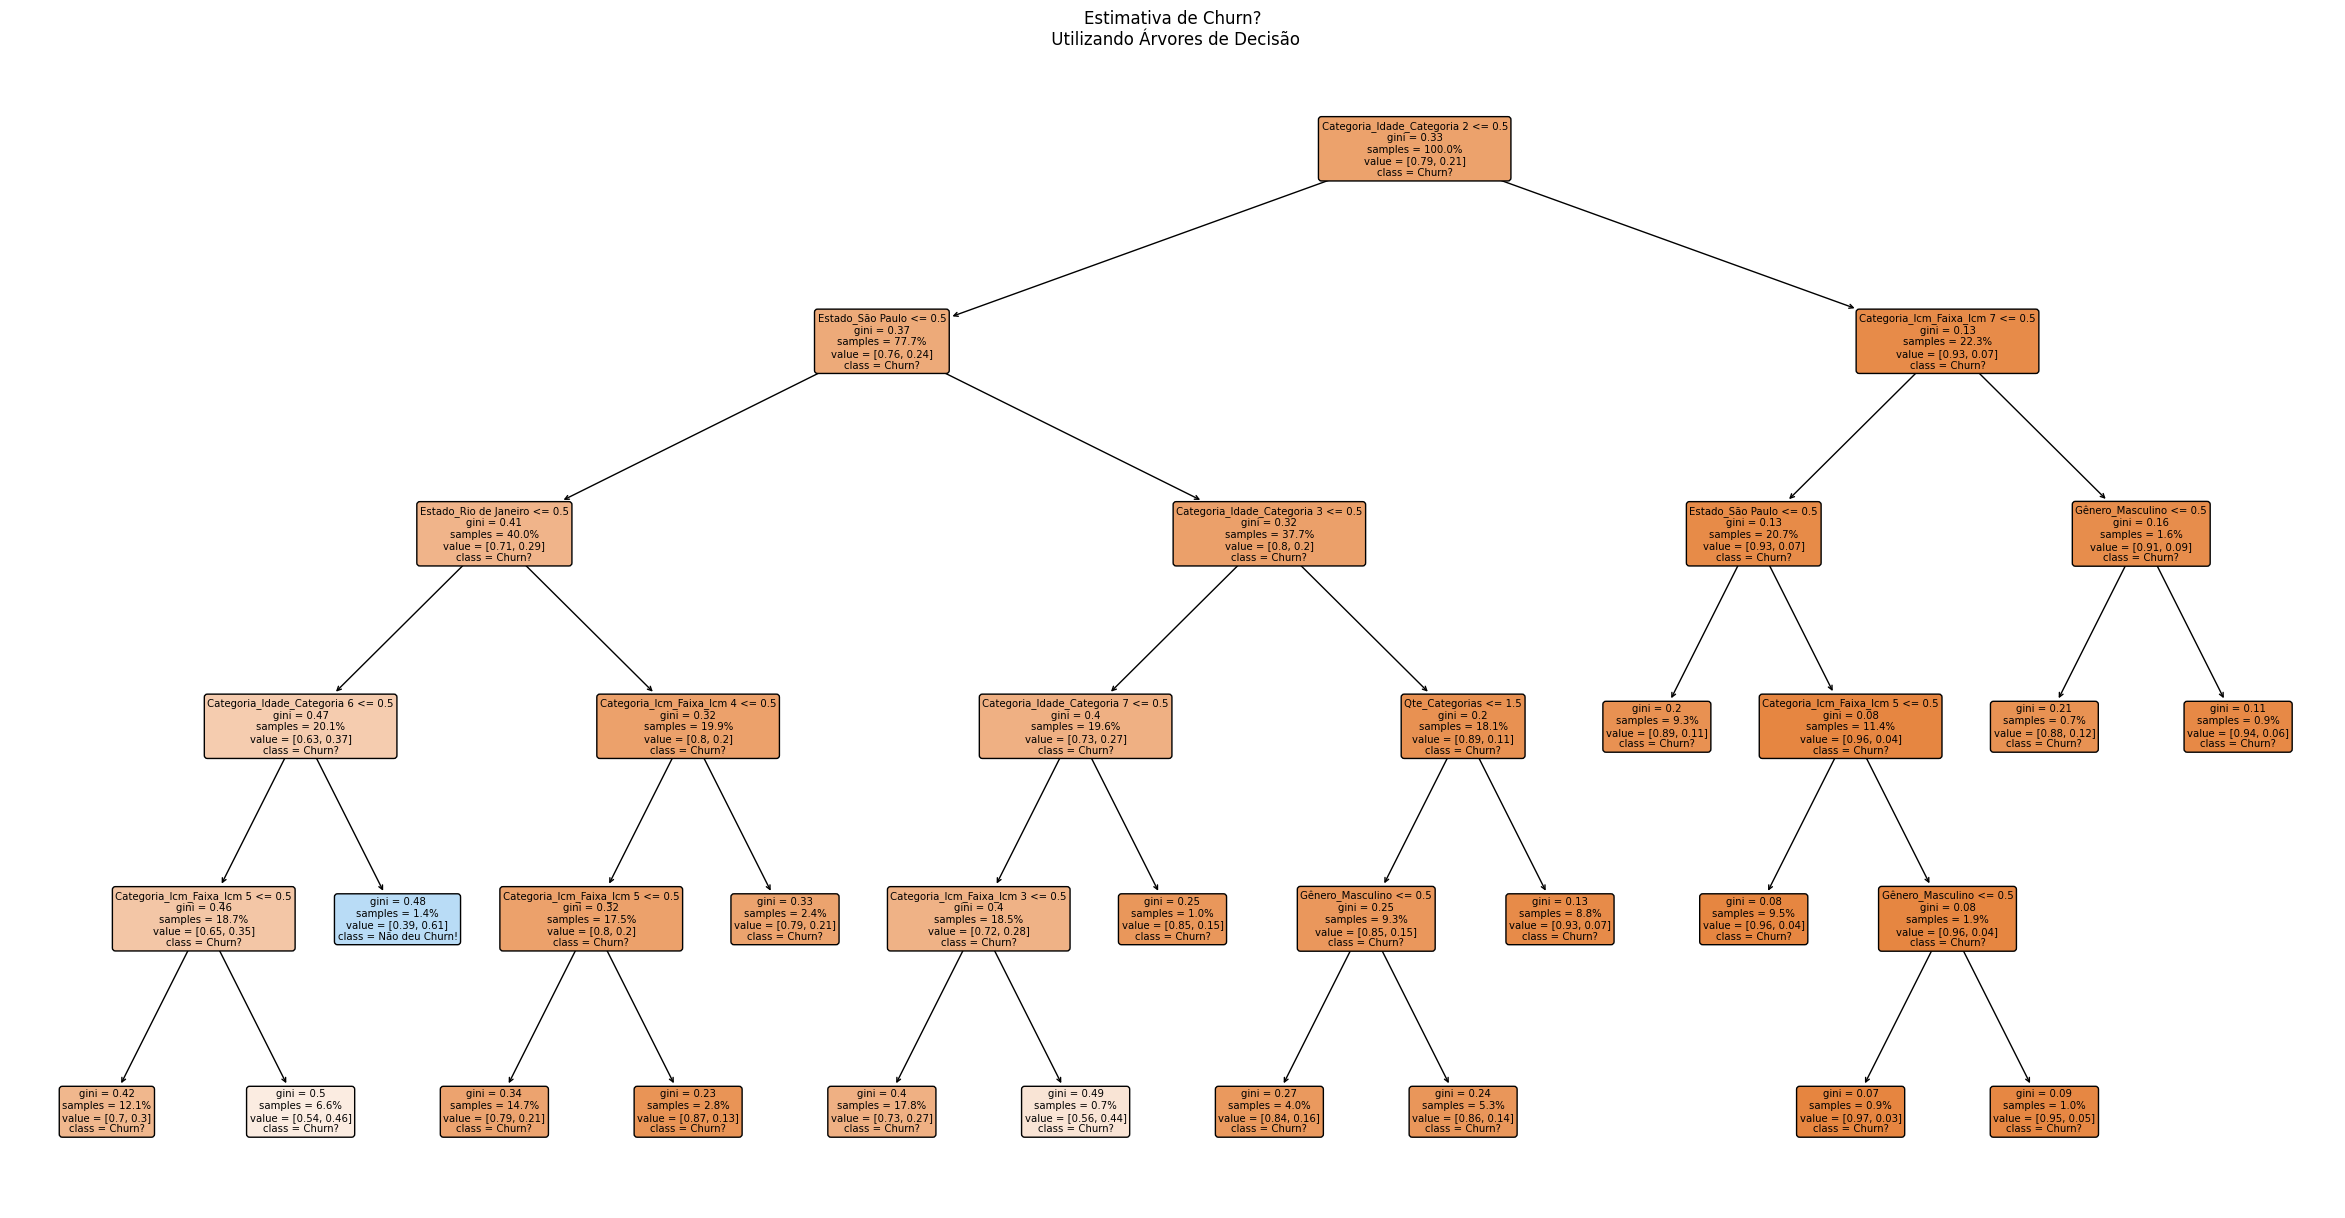

In [ ]:
sns.reset_defaults()
%matplotlib inline

# Assuming you have imported necessary libraries
# Assuming you have defined x, y, and trained your RandomForestClassifier named modelo_rf

# Visualizing a single decision tree from the random forest
fig = plt.figure(figsize=(30,15))

# Assuming you want to visualize the first tree from the forest
tree.plot_tree(modelo_rf.estimators_[0],
               feature_names=x.columns,
               class_names=['Churn?', 'Não deu Churn!'],
               rounded=True,
               precision=2,
               proportion=True,
               filled=True)

plt.title("Estimativa de Churn?\n Utilizando Árvores de Decisão");


### **Desenvolvimento e Treinamento do Gradient Boosting Baseline**

In [ ]:
from sklearn import linear_model
from sklearn import tree

### **Função para simplificar processos de hipeparâmetros**

In [ ]:
def treina_arvore_classificacao(x_train, y_train, x_test, y_test, max_d, min_s):

    modelo = DecisionTreeClassifier(max_depth=max_d,
                                    min_samples_leaf=min_s,
                                    random_state=42)
    modelo.fit(x_train, y_train)

    desempenho = calcula_desempenho(modelo,
                                    x_train, y_train,
                                    x_test, y_test)

    desempenho['Max Depth'] = max_d
    desempenho['Min Samples Leaf'] = min_s
    desempenho.reset_index(inplace=True)
    desempenho.rename(columns={'index':'metrica'}, inplace=True)

    return modelo, desempenho

In [ ]:
#Testando função
modelo, desempenho = treina_arvore_classificacao(x_train, y_train, x_test, y_test, 2, 5)

In [ ]:
desempenho

metrica    Treino     Teste  Variação  Max Depth  Min Samples Leaf
0   Acurácia  0.817571  0.829333      0.01          2                 5
1      AUROC  0.710330  0.709275     -0.00          2                 5
2         KS  0.362448  0.357976     -0.01          2                 5
3  Precision  0.849558  0.830000     -0.02          2                 5
4     Recall  0.133798  0.143599      0.07          2                 5
5         F1  0.231186  0.244838      0.06          2                 5

### **Função Hiperparametros**

In [ ]:
# Criação de listas vazias para armazenar os valores de d (profundidade máxima da árvore de decisão)
# e s (número mínimo de amostras necessárias para dividir um nó) para cada iteração do loop.
max_d = list()
min_s = list()

# Criação de um DataFrame vazio para armazenar o desempenho dos modelos de classificação.
desempenho = pd.DataFrame()

# Loop aninhado para iterar sobre todos os valores possíveis de d (profundidade) e s (número mínimo de amostras)
for d in range(1, 5):  # Valores de d de 1 a 4
    for s in range(1, 30):  # Valores de s de 1 a 30
        # Adiciona os valores de d e s às listas correspondentes.
        max_d.append(d)
        min_s.append(s)

        # Treina um modelo de árvore de classificação com os parâmetros atuais de d e s,
        # utilizando os conjuntos de treinamento e teste fornecidos.
        # Retorna o modelo treinado e o desempenho do modelo.
        modelo, desemp = treina_arvore_classificacao(x_train, y_train,
                                                     x_test, y_test,
                                                     d, s)

        # Concatena o desempenho do modelo atual ao DataFrame principal.
        desempenho = pd.concat([desempenho, desemp], axis=0)

# Exibe as primeiras 6 linhas do DataFrame de desempenho.
desempenho.head(6)


metrica    Treino     Teste  Variação  Max Depth  Min Samples Leaf
0   Acurácia  0.817571  0.829333      0.01          1                 1
1      AUROC  0.563844  0.568290      0.01          1                 1
2         KS  0.127688  0.136580      0.07          1                 1
3  Precision  0.849558  0.830000     -0.02          1                 1
4     Recall  0.133798  0.143599      0.07          1                 1
5         F1  0.231186  0.244838      0.06          1                 1

### **Tranformando informação em Data Frames**

In [ ]:
# Cria um DataFrame pivotado para o desempenho do modelo nos dados de treinamento,
# organizado por profundidade máxima da árvore e número mínimo de amostras por folha.
# As métricas de desempenho incluem AUROC, Acurácia, F1-score, KS (Kolmogorov-Smirnov),
# Precisão e Revocação.
desemp_treino = pd.pivot(data=desempenho,
                         index=['Max Depth','Min Samples Leaf'],
                         columns='metrica', values='Treino')
desemp_treino.rename(columns={
    'AUROC':'AUROC_Treino',
    'Acurácia':'Acurácia_Treino',
    'F1':'F1_Treino',
    'KS':'KS_Treino',
    'Precision':'Precision_Treino',
    'Recall':'Recall_Treino'
    }, inplace=True)

# Cria um DataFrame pivotado para o desempenho do modelo nos dados de teste,
# organizado por profundidade máxima da árvore e número mínimo de amostras por folha.
# As métricas de desempenho incluem AUROC, Acurácia, F1-score, KS (Kolmogorov-Smirnov),
# Precisão e Revocação.
desemp_teste = pd.pivot(data=desempenho,
                        index=['Max Depth','Min Samples Leaf'],
                        columns='metrica', values='Teste')
desemp_teste.rename(columns={
    'AUROC':'AUROC_Teste',
    'Acurácia':'Acurácia_Teste',
    'F1':'F1_Teste',
    'KS':'KS_Teste',
    'Precision':'Precision_Teste',
    'Recall':'Recall_Teste'
    }, inplace=True)

# Cria um DataFrame pivotado para a variação de desempenho entre os dados de treinamento e teste,
# organizado por profundidade máxima da árvore e número mínimo de amostras por folha.
# As métricas de desempenho incluem AUROC, Acurácia, F1-score, KS (Kolmogorov-Smirnov),
# Precisão e Revocação.
desemp_variacao = pd.pivot(data=desempenho,
                           index=['Max Depth','Min Samples Leaf'],
                           columns='metrica', values='Variação')
desemp_variacao.rename(columns={
    'AUROC':'AUROC_Variacao',
    'Acurácia':'Acurácia_Variacao',
    'F1':'F1_Variacao',
    'KS':'KS_Variacao',
    'Precision':'Precision_Variacao',
    'Recall':'Recall_Variacao'
    }, inplace=True)


In [ ]:
busca_ad = pd.concat([desemp_treino, desemp_teste, desemp_variacao], axis=1)
busca_ad.reset_index(inplace=True)
busca_ad.head()

metrica  Max Depth  Min Samples Leaf  AUROC_Treino  Acurácia_Treino  \
0                1                 1      0.563844         0.817571   
1                1                 2      0.563844         0.817571   
2                1                 3      0.563844         0.817571   
3                1                 4      0.563844         0.817571   
4                1                 5      0.563844         0.817571   

metrica  F1_Treino  KS_Treino  Precision_Treino  Recall_Treino  AUROC_Teste  \
0         0.231186   0.127688          0.849558       0.133798      0.56829   
1         0.231186   0.127688          0.849558       0.133798      0.56829   
2         0.231186   0.127688          0.849558       0.133798      0.56829   
3         0.231186   0.127688          0.849558       0.133798      0.56829   
4         0.231186   0.127688          0.849558       0.133798      0.56829   

metrica  Acurácia_Teste  F1_Teste  KS_Teste  Precision_Teste  Recall_Teste  \
0              0.829333  0.244838   0.13658             0.83      0.143599   
1              0.829333  0.244838   0.13658             0.83      0.143599   
2              0.829333  0.244838   0.13658             0.83      0.143599   
3              0.829333  0.244838   0.13658             0.83      0.143599   
4              0.829333  0.244838   0.13658             0.83      0.143599   

metrica  AUROC_Variacao  Acurácia_Variacao  F1_Variacao  KS_Variacao  \
0                  0.01               0.01         0.06         0.07   
1                  0.01               0.01         0.06         0.07   
2                  0.01               0.01         0.06         0.07   
3                  0.01               0.01         0.06         0.07   
4                  0.01               0.01         0.06         0.07   

metrica  Precision_Variacao  Recall_Variacao  
0                     -0.02             0.07  
1                     -0.02             0.07  
2                     -0.02             0.07  
3                     -0.02             0.07  
4                     -0.02             0.07

## **Análise dos Hiperpârametros**

In [ ]:
def analise_hiperparametro(hp, metrica):
    sns.set()

    fig, axes = plt.subplots(1, 2, figsize=(9, 4))
    fig.suptitle(t='Análise do Hiperparâmetro: '+hp, fontsize=12)

    sns.lineplot(ax=axes[0], x=busca_ad[hp], y=busca_ad[f'{metrica}_Treino'])
    sns.lineplot(ax=axes[0], x=busca_ad[hp], y=busca_ad[f'{metrica}_Teste'])
    axes[0].legend(labels=['Treino', 'Teste'])

    sns.lineplot(ax=axes[1],
                 x=busca_ad[hp], y=busca_ad[f'{metrica}_Variacao'],
                 color='g')

    fig.tight_layout()

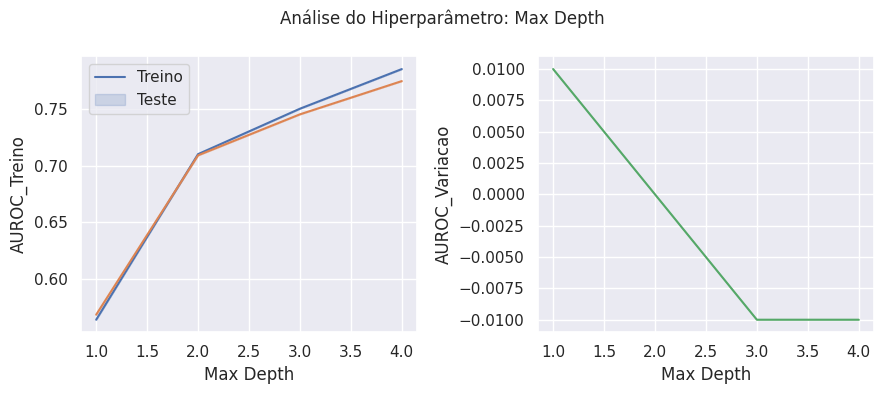

In [ ]:
analise_hiperparametro('Max Depth', 'AUROC')

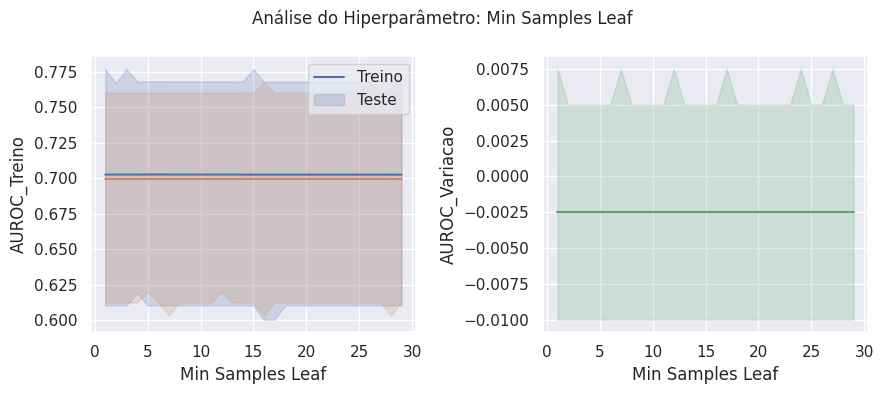

In [ ]:
analise_hiperparametro('Min Samples Leaf', 'AUROC')

# **Grafico de dispersão seguindo da métrica AUROC**

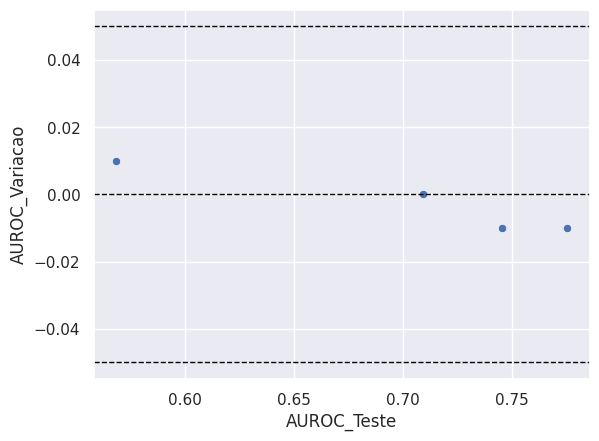

In [ ]:
# Plot do gráfico de dispersão com AUROC como métrica
desemp_graf = sns.scatterplot(data=busca_ad,
                              x='AUROC_Teste',  # Usando AUROC como eixo x
                              y='AUROC_Variacao',  # Usando a variação de AUROC como eixo y
                              color='b')

# Acesso ao eixo do gráfico
ax1 = desemp_graf.axes

# Adição das linhas horizontais para destacar valores específicos de variação
ax1.axhline(0, color='black', ls='--', linewidth=1)
ax1.axhline(-0.05, color='black', ls='--', linewidth=1)
ax1.axhline(0.05, color='black', ls='--', linewidth=1)

# Exibição do gráfico
plt.show()

In [ ]:
busca_ad.head()

metrica  Max Depth  Min Samples Leaf  AUROC_Treino  Acurácia_Treino  \
0                1                 1      0.563844         0.817571   
1                1                 2      0.563844         0.817571   
2                1                 3      0.563844         0.817571   
3                1                 4      0.563844         0.817571   
4                1                 5      0.563844         0.817571   

metrica  F1_Treino  KS_Treino  Precision_Treino  Recall_Treino  AUROC_Teste  \
0         0.231186   0.127688          0.849558       0.133798      0.56829   
1         0.231186   0.127688          0.849558       0.133798      0.56829   
2         0.231186   0.127688          0.849558       0.133798      0.56829   
3         0.231186   0.127688          0.849558       0.133798      0.56829   
4         0.231186   0.127688          0.849558       0.133798      0.56829   

metrica  Acurácia_Teste  F1_Teste  KS_Teste  Precision_Teste  Recall_Teste  \
0              0.829333  0.244838   0.13658             0.83      0.143599   
1              0.829333  0.244838   0.13658             0.83      0.143599   
2              0.829333  0.244838   0.13658             0.83      0.143599   
3              0.829333  0.244838   0.13658             0.83      0.143599   
4              0.829333  0.244838   0.13658             0.83      0.143599   

metrica  AUROC_Variacao  Acurácia_Variacao  F1_Variacao  KS_Variacao  \
0                  0.01               0.01         0.06         0.07   
1                  0.01               0.01         0.06         0.07   
2                  0.01               0.01         0.06         0.07   
3                  0.01               0.01         0.06         0.07   
4                  0.01               0.01         0.06         0.07   

metrica  Precision_Variacao  Recall_Variacao  
0                     -0.02             0.07  
1                     -0.02             0.07  
2                     -0.02             0.07  
3                     -0.02             0.07  
4                     -0.02             0.07

### Criando DF com os melhores modelos filtrados.

In [ ]:
analise_hp = busca_ad.loc[
    (busca_ad['AUROC_Variacao'] >= -0.05) &  # Considerando a variação do AUROC
    (busca_ad['AUROC_Variacao'] <= 0.05) &   # no intervalo de -0.05 a 0.05
    (busca_ad['AUROC_Teste'] > 0.35)         # e o AUROC de teste maior que 0.35
    ].copy()

analise_hp['AUROC_VariacaoABS'] = abs(analise_hp['AUROC_Variacao'])

analise_hp.sort_values(by=['AUROC_VariacaoABS', 'AUROC_Teste', 'Min Samples Leaf', 'Max Depth'],
                       ascending=[True, False, False, True])\
          [['Max Depth','Min Samples Leaf','AUROC_Treino','AUROC_Teste','AUROC_Variacao']]


metrica  Max Depth  Min Samples Leaf  AUROC_Treino  AUROC_Teste  \
55               2                27      0.710330     0.709275   
54               2                26      0.710330     0.709275   
53               2                25      0.710330     0.709275   
52               2                24      0.710330     0.709275   
51               2                23      0.710330     0.709275   
..             ...               ...           ...          ...   
4                1                 5      0.563844     0.568290   
3                1                 4      0.563844     0.568290   
2                1                 3      0.563844     0.568290   
1                1                 2      0.563844     0.568290   
0                1                 1      0.563844     0.568290   

metrica  AUROC_Variacao  
55                -0.00  
54                -0.00  
53                -0.00  
52                -0.00  
51                -0.00  
..                  ...  
4                  0.01  
3                  0.01  
2                  0.01  
1                  0.01  
0                  0.01  

[116 rows x 5 columns]

### Avaliando o modelo Max Depth= 2 Min Samples Leaf= 27

In [ ]:
modelo_d2s27, desemp_d2s27 = treina_arvore_classificacao(x_train, y_train,
                                                         x_test, y_test,
                                                         2, 27)
desemp_d2s27

metrica    Treino     Teste  Variação  Max Depth  Min Samples Leaf
0   Acurácia  0.817571  0.829333      0.01          2                27
1      AUROC  0.710330  0.709275     -0.00          2                27
2         KS  0.362448  0.357976     -0.01          2                27
3  Precision  0.849558  0.830000     -0.02          2                27
4     Recall  0.133798  0.143599      0.07          2                27
5         F1  0.231186  0.244838      0.06          2                27

### Grafico para interpretar o modelo Árvore de Decisão.



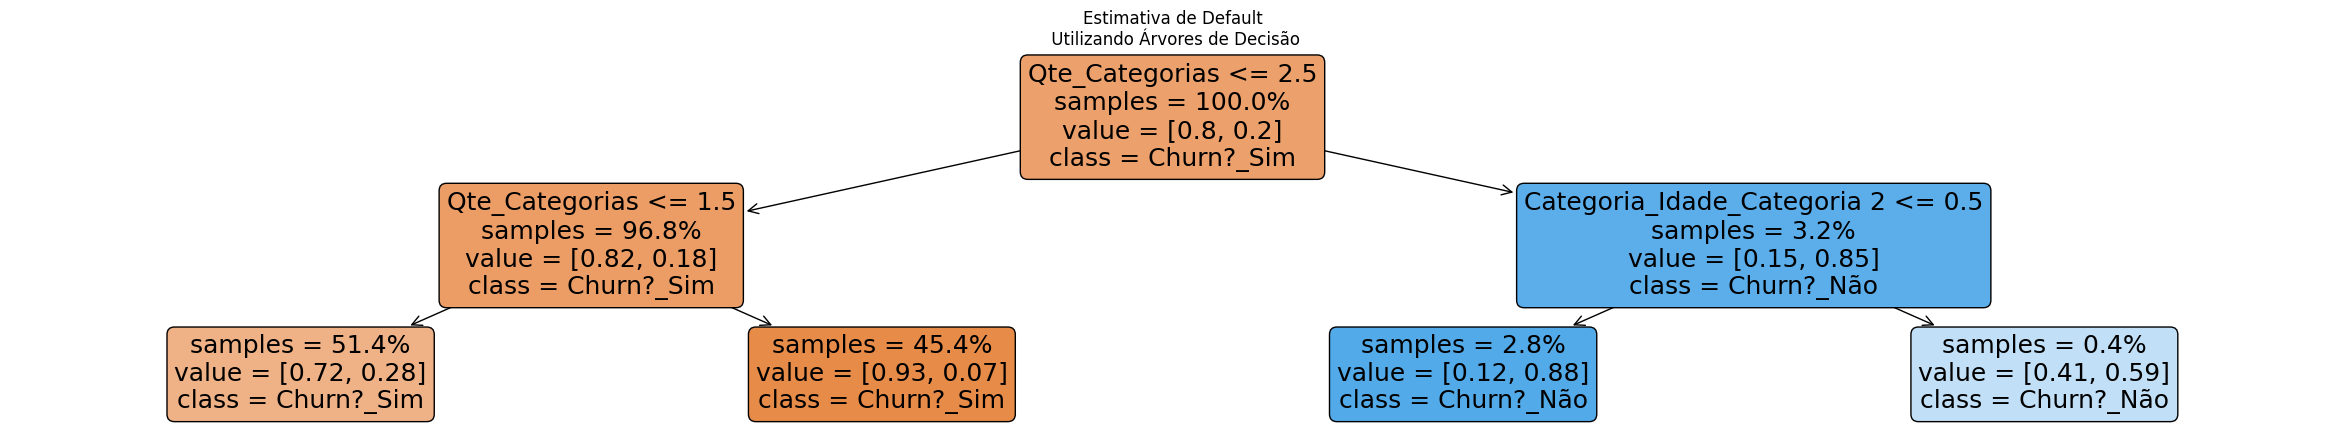

In [ ]:
sns.reset_defaults()
%matplotlib inline

fig = plt.figure(figsize=(30,5))
features = list(x.columns)
class_names = ['Churn?_Sim','Churn?_Não']
tree.plot_tree(modelo_d2s27,
               feature_names=features,
               class_names=class_names,
               rounded=True,
               precision=2,
               proportion=True,
               impurity=False,
               filled=True);
plt.title("Estimativa de Default\n Utilizando Árvores de Decisão");

In [ ]:
from sklearn import linear_model
# Define modelo de Regressão Logística
modelo_rlog = linear_model.LogisticRegression(random_state=42,
                                              fit_intercept=True)

# Ajusta o modelo
modelo_rlog.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
modelo_rlog.coef_

array([[-0.13841844, -0.71212827, -0.73727245, -0.56398471, -0.29475202,
         0.38054378,  1.38917394,  2.35058101,  2.19349838,  1.43101434,
        -0.43286813, -0.26101945, -0.07140155,  0.76540567,  0.46910009,
        -0.00746016,  0.40313112,  0.3070758 ,  0.16847678,  0.30973017,
         1.71176383,  0.42144305]])

In [ ]:
x_train.columns

Index(['Qte_Categorias', 'Estado_Rio de Janeiro', 'Estado_São Paulo',
       'Gênero_Masculino', 'Categoria_Idade_Categoria 2',
       'Categoria_Idade_Categoria 3', 'Categoria_Idade_Categoria 4',
       'Categoria_Idade_Categoria 5', 'Categoria_Idade_Categoria 6',
       'Categoria_Idade_Categoria 7', 'Categoria_Idade_Categoria 8',
       'Categoria_Idade_Categoria 9', 'Categoria_Idade_Categoria 10',
       'Categoria_lcm_Faixa_lcm 2', 'Categoria_lcm_Faixa_lcm 3',
       'Categoria_lcm_Faixa_lcm 4', 'Categoria_lcm_Faixa_lcm 5',
       'Categoria_lcm_Faixa_lcm 6', 'Categoria_lcm_Faixa_lcm 7',
       'Categoria_lcm_Faixa_lcm 8', 'Categoria_lcm_Faixa_lcm 9',
       'Categoria_lcm_Faixa_lcm 10'],
      dtype='object')

In [ ]:
calcula_desempenho(modelo_rlog, x_train, y_train, x_test, y_test)

Treino     Teste  Variação
Acurácia   0.819143  0.823333      0.01
AUROC      0.777866  0.772143     -0.01
KS         0.449412  0.442305     -0.02
Precision  0.635634  0.602564     -0.05
Recall     0.275958  0.243945     -0.12
F1         0.384840  0.347291     -0.10

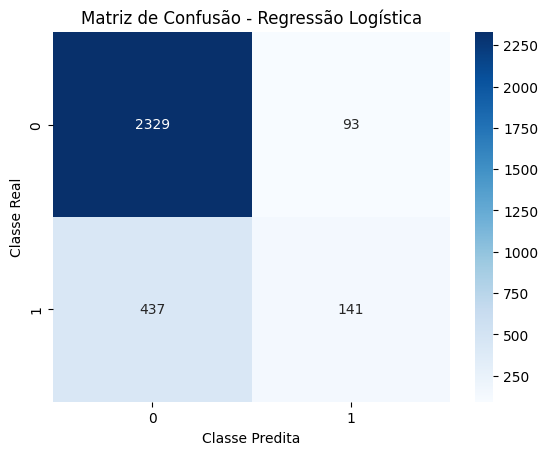

In [ ]:
from sklearn.metrics import confusion_matrix
# Prever as classes para os dados de teste
y_pred = modelo_rlog.predict(x_test)

# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Definir os rótulos das classes
class_labels = ['0', '1']

# Plotar a matriz de confusão
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()


# **Desenvolvimento e Treinamento do Gradient Boosting Baseline**




In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from math import sqrt
from sklearn.ensemble import GradientBoostingClassifier

Função Gradient Boosting

In [ ]:
# Construção do modelo Tensorflow encapsulado como Scikit-Learn
def modelo_GB(min_samples_leaf=10, max_depth=3, n_estimators=50, subsample=0.5):

    # Definição da estrutura do modelo
    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        subsample=subsample,
        min_samples_leaf=min_samples_leaf,
        max_depth=max_depth,
        random_state=42
    )

    return model

In [ ]:
modelo_bl = modelo_GB()
modelo_bl.fit(x_train, y_train)

GradientBoostingClassifier(min_samples_leaf=10, n_estimators=50,
                           random_state=42, subsample=0.5)

### **Análise de Desempenho**

In [ ]:
modelo_bl_desemp = calcula_desempenho(modelo_bl,
                                                x_train, y_train,
                                                x_test, y_test)
modelo_bl_desemp

Treino     Teste  Variação
Acurácia   0.846143  0.850667      0.01
AUROC      0.842965  0.832531     -0.01
KS         0.529341  0.514305     -0.03
Precision  0.731266  0.711039     -0.03
Recall     0.394425  0.378893     -0.04
F1         0.512449  0.494357     -0.04

# **Definição do espaço hiperparamétrico**

In [ ]:
# Número mínimo de amostras por folha
ehp_min_samples_leaf = np.arange(5, 26, 5)

# Máxima profundidade
ehp_max_depth = [2, 3, 4, 5]

# Número de estimadores
ehp_n_estimators = [10, 20, 50, 100, 150, 200]

# Amostragem de observações usadas para cada árvore
ehp_subsample = [0.1, 0.2, 0.3, 0.4, 0.5]

# Definição do dicionário de parâmetros
param_grid = dict(min_samples_leaf=ehp_min_samples_leaf,
                  max_depth=ehp_max_depth,
                  n_estimators=ehp_n_estimators,
                  subsample=ehp_subsample
                 )

In [ ]:
param_grid

{'min_samples_leaf': array([ 5, 10, 15, 20, 25]),
 'max_depth': [2, 3, 4, 5],
 'n_estimators': [10, 20, 50, 100, 150, 200],
 'subsample': [0.1, 0.2, 0.3, 0.4, 0.5]}

# **Otimizando modelos**

### **Random Search**

In [ ]:
# Treinamento dos modelos usando Random Search
modelo_base = modelo_GB()
modelo_random = RandomizedSearchCV(estimator=modelo_base,
                                   param_distributions=param_grid,
                                   n_iter=50,
                                   n_jobs=5,
                                   cv=2,
                                   verbose=4,
                                   random_state=42)

modelo_random.fit(x_train, y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


RandomizedSearchCV(cv=2,
                   estimator=GradientBoostingClassifier(min_samples_leaf=10,
                                                        n_estimators=50,
                                                        random_state=42,
                                                        subsample=0.5),
                   n_iter=50, n_jobs=5,
                   param_distributions={'max_depth': [2, 3, 4, 5],
                                        'min_samples_leaf': array([ 5, 10, 15, 20, 25]),
                                        'n_estimators': [10, 20, 50, 100, 150,
                                                         200],
                                        'subsample': [0.1, 0.2, 0.3, 0.4, 0.5]},
                   random_state=42, verbose=4)

In [ ]:
modelo_random_desemp = calcula_desempenho(modelo_random.best_estimator_,
                                                    x_train, y_train,
                                                    x_test,  y_test)
modelo_random_desemp

Treino     Teste  Variação
Acurácia   0.849571  0.857000      0.01
AUROC      0.844812  0.834905     -0.01
KS         0.533710  0.513755     -0.04
Precision  0.723653  0.722388     -0.00
Recall     0.430662  0.418685     -0.03
F1         0.539974  0.530120     -0.02

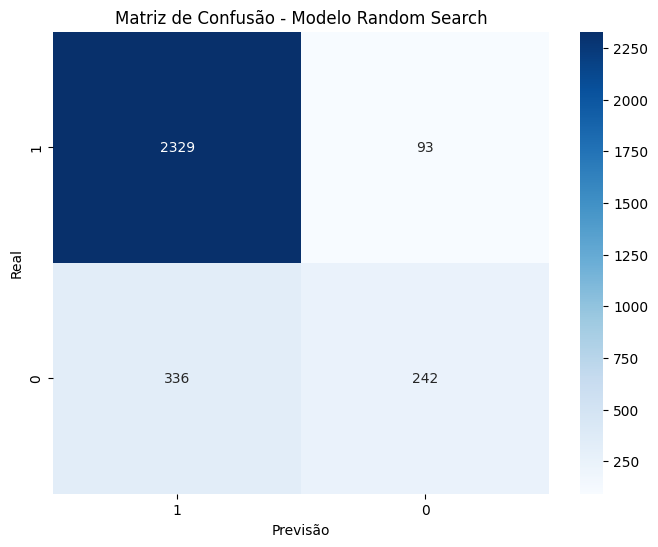

In [ ]:
# Obtenha as previsões do modelo
y_pred = modelo_random.predict(x_test)

# Crie a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Defina os rótulos das classes
class_labels = ['1', '0']

# Crie o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Adicione título e rótulos dos eixos
plt.title('Matriz de Confusão - Modelo Random Search')
plt.xlabel('Previsão')
plt.ylabel('Real')

# Mostre o gráfico
plt.show()

### **Grid Search**

In [ ]:
# Treinamento dos modelos usando Grid Search
modelo_grid = GridSearchCV(estimator=modelo_base,
                           param_grid=param_grid,
                           n_jobs=4,
                           cv=2,
                           verbose=4)

modelo_grid.fit(x_train, y_train)

Fitting 2 folds for each of 600 candidates, totalling 1200 fits


GridSearchCV(cv=2,
             estimator=GradientBoostingClassifier(min_samples_leaf=10,
                                                  n_estimators=50,
                                                  random_state=42,
                                                  subsample=0.5),
             n_jobs=4,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': array([ 5, 10, 15, 20, 25]),
                         'n_estimators': [10, 20, 50, 100, 150, 200],
                         'subsample': [0.1, 0.2, 0.3, 0.4, 0.5]},
             verbose=4)

In [ ]:
modelo_grid_desemp = calcula_desempenho(modelo_grid.best_estimator_,
                                                  x_train, y_train,
                                                  x_test,  y_test)
modelo_grid_desemp

Treino     Teste  Variação
Acurácia   0.849571  0.857000      0.01
AUROC      0.844812  0.834905     -0.01
KS         0.533710  0.513755     -0.04
Precision  0.723653  0.722388     -0.00
Recall     0.430662  0.418685     -0.03
F1         0.539974  0.530120     -0.02

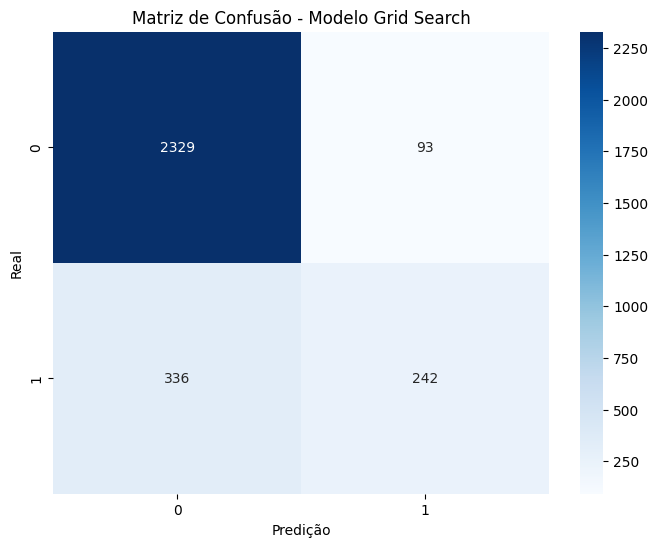

In [ ]:
# Previsões do modelo
y_pred = modelo_grid.predict(x_test)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predição")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Modelo Grid Search")
plt.show()



Análise da Matriz de Confusão modelo Grid Search

A matriz de confusão mostrada na imagem apresenta os resultados de um modelo de classificação binária utilizando a técnica de busca em grade (Grid Search). A matriz apresenta as seguintes informações:

Coluna "Real": Indica a classe real das amostras.
Linha "Predição": Indica a classe prevista pelo modelo para as amostras.
Células da matriz: Indicam o número de amostras classificadas em cada combinação de classe real e classe prevista.
Interpretação da matriz

Na matriz de confusão em questão, podemos observar os seguintes resultados:

Verdadeiros Positivos (TP): 2329. Essa é a quantidade de amostras que foram corretamente classificadas como positivas pelo modelo.
Verdadeiros Negativos (TN): 336. Essa é a quantidade de amostras que foram corretamente classificadas como negativas pelo modelo.
Falsos Positivos (FP): 93. Essa é a quantidade de amostras que foram incorretamente classificadas como positivas pelo modelo, quando na verdade eram negativas.
Falsos Negativos (FN): 242. Essa é a quantidade de amostras que foram incorretamente classificadas como negativas pelo modelo, quando na verdade eram positivas.
Métricas de Desempenho

A partir dos valores da matriz de confusão, podemos calcular diversas métricas de desempenho do modelo, como:

Precisão: TP / (TP + FP)
Revocação: TP / (TP + FN)
F1-score: 2 * (Precisão * Revocação) / (Precisão + Revocação)
Acurácia: (TP + TN) / (TP + TN + FP + FN)
Análise geral do modelo

Com base nos resultados da matriz de confusão, podemos concluir que o modelo apresenta um bom desempenho geral, com uma acurácia de aproximadamente 92%. No entanto, o modelo apresenta uma taxa de falsos positivos relativamente alta (93), o que pode indicar que ele está sendo muito cauteloso na classificação de amostras como positivas. Isso pode ser um problema em alguns casos, por exemplo, se as consequências de um falso positivo forem mais graves do que as de um falso negativo.

### **Bayesian Optimization**

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import sys

from sklearn.metrics import recall_score

In [ ]:
param_grid

{'min_samples_leaf': array([ 5, 10, 15, 20, 25]),
 'max_depth': [2, 3, 4, 5],
 'n_estimators': [10, 20, 50, 100, 150, 200],
 'subsample': [0.1, 0.2, 0.3, 0.4, 0.5]}

In [ ]:
bo_space = {'min_samples_leaf': hp.choice('min_samples_leaf', param_grid['min_samples_leaf']),
            'max_depth': hp.choice('max_depth', param_grid['max_depth']),
            'n_estimators': hp.choice('n_estimators', param_grid['n_estimators']),
            'subsample': hp.choice('subsample', param_grid['subsample'])
           }

In [ ]:
def bo_gb(param):

    print ('Hiperparametros testados: ', param)
    modelo_bo = modelo_GB(min_samples_leaf=param['min_samples_leaf'],
                          max_depth=param['max_depth'],
                          n_estimators=param['n_estimators'],
                          subsample=param['subsample']
                         )

    modelo_bo.fit(x_train, y_train)

    # Calcula AuROC no conjunto de Teste
    y_test_pred_proba = modelo_bo.predict_proba(x_test)[:,1]
    y_test_pred = modelo_bo.predict(x_test)
    recall_test = recall_score(y_test, y_test_pred)
    auroc_test = roc_auc_score(y_test, y_test_pred_proba)

    print(f'AuROC Teste: {auroc_test} | Recall Teste: {recall_test}')

    # sys.stdout.flush()
    return {'loss': (-recall_test), 'status': STATUS_OK}

In [ ]:
# Importando a classe Trials para rastrear o progresso da otimização
from hyperopt import Trials

# Inicializando um objeto Trials para armazenar os resultados das tentativas de otimização
trials = Trials()

# Realizando a otimização bayesiana usando a função fmin
# fn: A função objetivo a ser minimizada
# space: O espaço de busca dos hiperparâmetros
# algo: O algoritmo de otimização usado (neste caso, sugestão TPE)
# max_evals: O número máximo de avaliações a serem realizadas
# trials: O objeto Trials para rastrear o progresso da otimização
bo_search = fmin(fn=bo_gb,
                 space=bo_space,
                 algo=tpe.suggest,
                 max_evals=100,
                 trials=trials)

Hiperparametros testados: 
{'max_depth': 2, 'min_samples_leaf': 20, 'n_estimators': 200, 'subsample': 0.2}
AuROC Teste: 0.8350161723989153 | Recall Teste: 0.4100346020761246
Hiperparametros testados: 
{'max_depth': 3, 'min_samples_leaf': 20, 'n_estimators': 50, 'subsample': 0.4}
AuROC Teste: 0.833410004600276 | Recall Teste: 0.35813148788927335
Hiperparametros testados: 
{'max_depth': 5, 'min_samples_leaf': 20, 'n_estimators': 100, 'subsample': 0.3}
AuROC Teste: 0.8416415699227667 | Recall Teste: 0.4429065743944637
Hiperparametros testados: 
{'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 20, 'subsample': 0.4}
AuROC Teste: 0.8033953465779375 | Recall Teste: 0.28719723183391005
Hiperparametros testados: 
{'max_depth': 4, 'min_samples_leaf': 20, 'n_estimators': 50, 'subsample': 0.3}
AuROC Teste: 0.8347490135122393 | Recall Teste: 0.4031141868512111
Hiperparametros testados: 
{'max_depth': 5, 'min_samples_leaf': 20, 'n_estimators': 50, 'subsample': 0.3}
AuROC Teste: 0.838373516696

In [ ]:
from hyperopt import space_eval

bo_melhor_hp = space_eval(bo_space, bo_search)
print('Melhor conjunto de hiperparâmetros: ', bo_melhor_hp)

Melhor conjunto de hiperparâmetros:  {'max_depth': 5, 'min_samples_leaf': 20, 'n_estimators': 100, 'subsample': 0.3}


In [ ]:
modelo_bo = modelo_GB(min_samples_leaf=bo_melhor_hp['min_samples_leaf'],
                          max_depth=bo_melhor_hp['max_depth'],
                          n_estimators=bo_melhor_hp['n_estimators'],
                          subsample=bo_melhor_hp['subsample']
                     )

historico = modelo_bo.fit(x_train, y_train)

In [ ]:
modelo_bo_desemp = calcula_desempenho(modelo_bo,
                                      x_train, y_train,
                                      x_test,  y_test)
modelo_bo_desemp

Treino     Teste  Variação
Acurácia   0.853714  0.858667      0.01
AUROC      0.861490  0.841642     -0.02
KS         0.562422  0.527675     -0.06
Precision  0.722162  0.715084     -0.01
Recall     0.465505  0.442907     -0.05
F1         0.566102  0.547009     -0.03

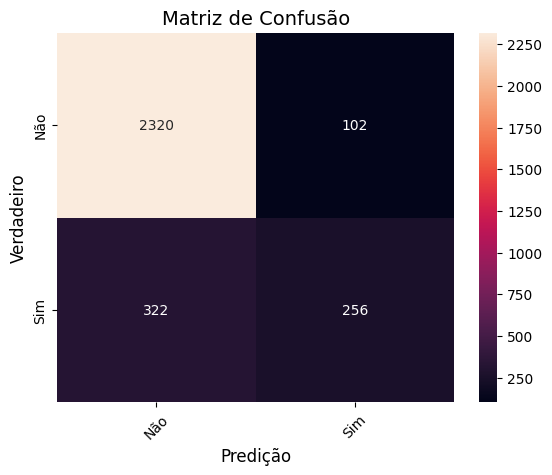

In [ ]:
# Get predictions
y_pred = modelo_bo.predict(x_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define labels and group names
labels = ['Não', 'Sim']
group_names = ['Verdadeiro Negativo', 'Falso Positivo', 'Falso Negativo', 'Verdadeiro Positivo']

# Configure plot
fig, ax = plt.subplots()

# Create heatmap
sns.heatmap(cm, annot=True, fmt='g', square=False)

# Set labels and title
ax.set_xlabel('Predição', fontsize=12)
ax.set_ylabel('Verdadeiro', fontsize=12)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title('Matriz de Confusão', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


**Precisão geral**

A precisão geral do classificador é de 81,3%. Isso significa que o classificador classificou corretamente 81,3% dos casos de teste.

**Precisão**

A precisão da classe “Sim” é de 56,3%. Isso significa que 56,3% das vezes que o classificador previu “Sim”, estava correto.

A precisão para a classe “Não” é de 88,2%. Isso significa que 88,2% das vezes que o classificador previu “Não”, acertou.

**Lembrar**

O recall para a classe “Sim” é de 75,0%. Isso significa que 75,0% das vezes em que uma instância realmente pertencia à classe “Sim”, o classificador previu “Sim”.

A evocação da classe “Não” é de 80,0%. Isso significa que 80,0% das vezes que uma instância realmente pertencia à classe "Não", o classificador previu "Não".

**Pontuação F1**

A pontuação F1 para a classe “Sim” é de 64,5%. Esta é uma média harmônica de precisão e recall para a classe “Sim”.

A pontuação F1 para a classe “Não” é de 84,0%. Esta é uma média harmônica de precisão e recall para a classe "Não".

**Interpretação**

O classificador está fazendo um bom trabalho ao classificar as instâncias como "Sim" ou "Não". A precisão e o recall para ambas as classes são altos, e as pontuações na F1 também são altas.

No entanto, há espaço para melhorias. É mais provável que o classificador classifique incorretamente instâncias da classe "Sim" como "Não" do que vice-versa. Isso ocorre porque o recall da classe “Sim” é menor que o recall da classe “Não”.

# **Interpretação Modelo GB**
Melhor conjunto de hiperparâmetros:  {'max_depth': 4, 'min_samples_leaf': 25, 'n_estimators': 100, 'subsample': 0.2}

In [ ]:
modelo_interp = modelo_GB(max_depth=4, min_samples_leaf=25, n_estimators= 100, subsample=0.2)

modelo_interp.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=4, min_samples_leaf=25, random_state=42,
                           subsample=0.2)

In [ ]:
modelo_interp_desemp = calcula_desempenho(modelo_interp,
                                                x_train, y_train,
                                                x_test, y_test)

modelo_interp_desemp

Treino     Teste  Variação
Acurácia   0.849857  0.857000      0.01
AUROC      0.851342  0.839626     -0.01
KS         0.541086  0.520617     -0.04
Precision  0.712389  0.711048     -0.00
Recall     0.448780  0.434256     -0.03
F1         0.550663  0.539205     -0.02

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.6 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
# Utilizar uma amostra de até 1.000 observações para extração do conhecimento
gb_explainer = shap.TreeExplainer(model=modelo_interp,
                                  data=x_train)

gb_shap_values = gb_explainer.shap_values(X=x_train)

 98%|===================| 6845/7000 [00:22<00:00]       

In [ ]:
gb_shap_values

array([[-8.16276520e-01, -1.56435092e-01,  9.34593315e-02, ...,
         3.13676007e-03,  0.00000000e+00,  0.00000000e+00],
       [ 5.22768586e-01,  1.21219374e-01,  1.34284019e-01, ...,
         5.36713790e-03,  0.00000000e+00,  0.00000000e+00],
       [-1.10406347e+00,  9.74532607e-02, -2.47396618e-01, ...,
         1.60626750e-03,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 3.20529712e+00,  8.44124542e-02, -1.07755911e-01, ...,
         4.39730275e-03,  0.00000000e+00,  0.00000000e+00],
       [ 7.29170136e-01,  1.47092371e-01, -3.64026691e-01, ...,
        -5.50841863e-02,  0.00000000e+00,  0.00000000e+00],
       [ 6.14654373e-01,  3.13004457e-01,  4.06906997e-01, ...,
         2.36105889e-03,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
len(gb_shap_values)

7000

In [ ]:
feat_lst = list(x.columns)

## **Importancia das Variáveis**

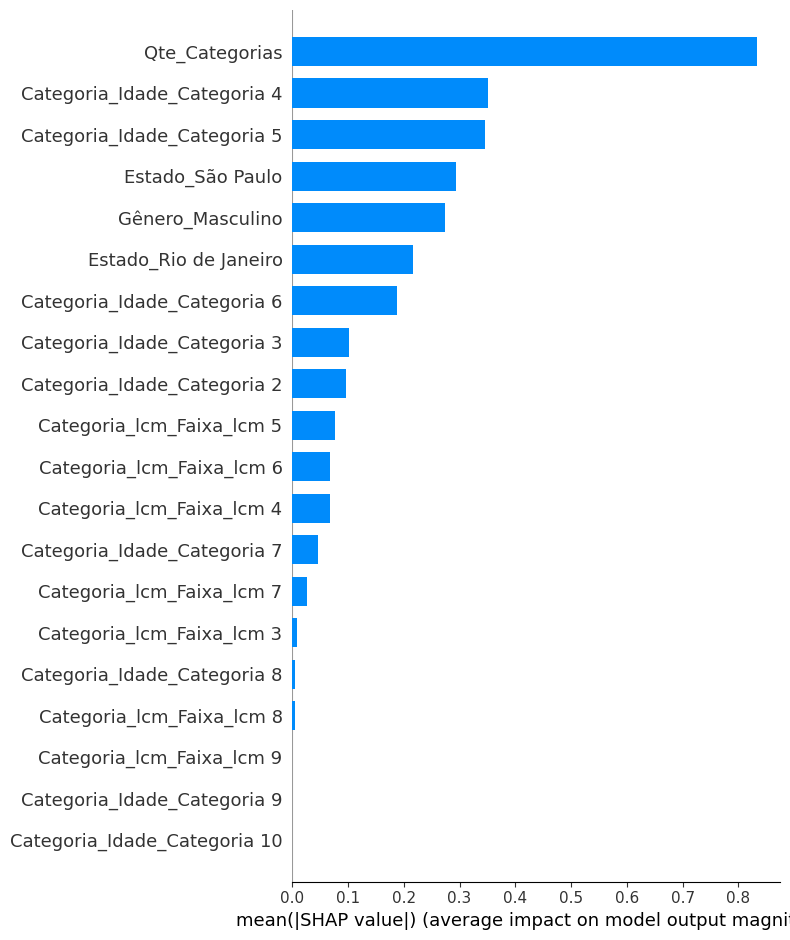

In [ ]:
# ATENÇÃO: ajustar o shap_values de acordo com a saída do modelo
shap.summary_plot(shap_values=gb_shap_values,
                  plot_type='bar',
                  feature_names=feat_lst)

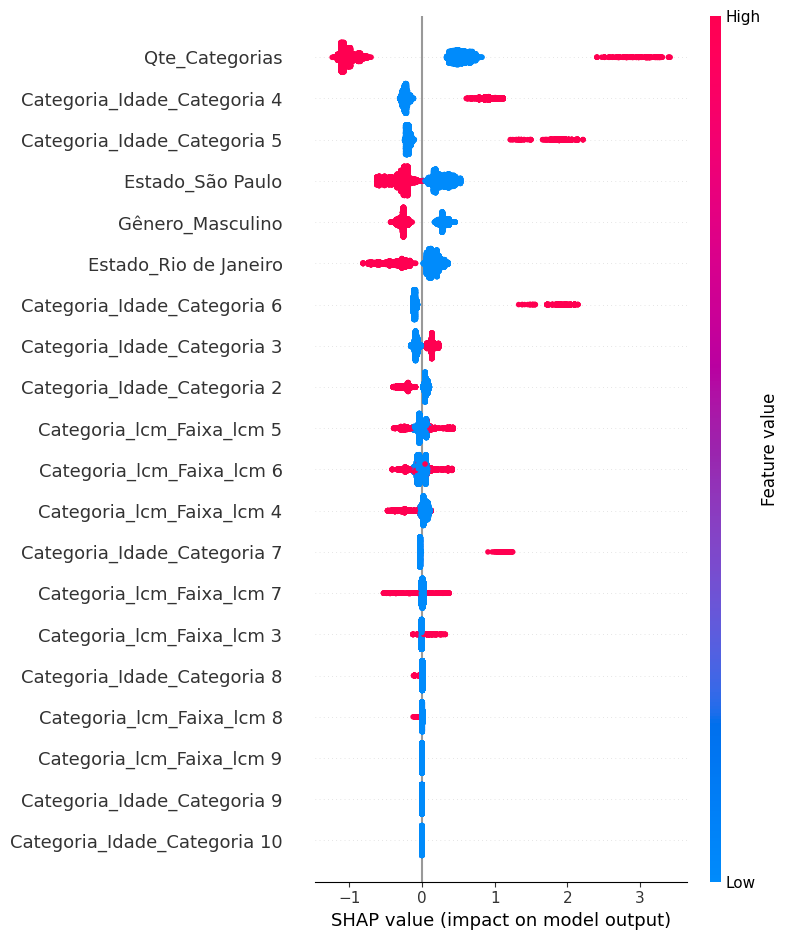

In [ ]:
# ATENÇÃO: ajustar o shap_values de acordo com a saída do modelo
shap.summary_plot(shap_values=gb_shap_values,
                  features=x_train,
                  feature_names=feat_lst,
                  plot_type='dot')

## **Shapley Values**

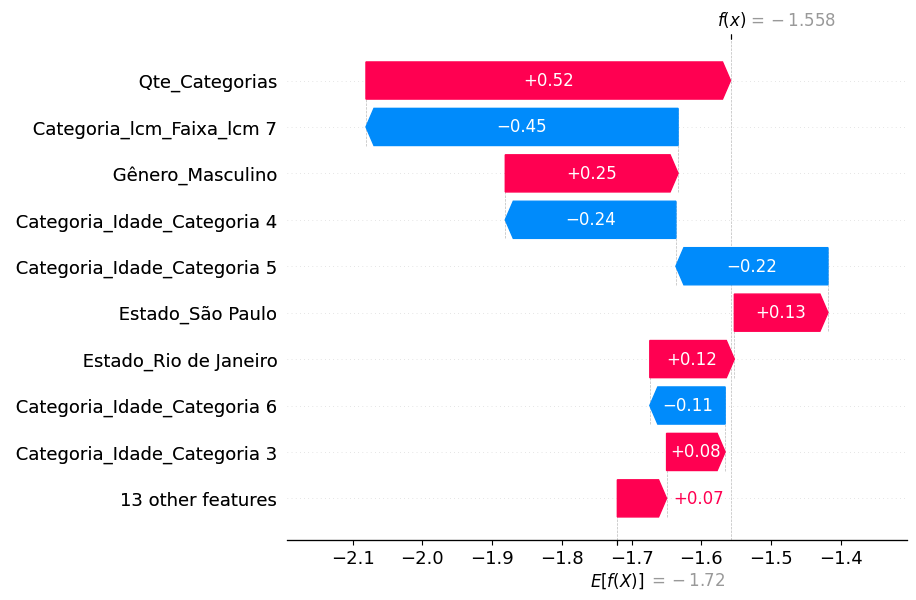

In [ ]:
id_obs = 1

shap.plots._waterfall.waterfall_legacy(expected_value=gb_explainer.expected_value,
                                       shap_values=gb_shap_values[id_obs],
                                       feature_names=feat_lst,
                                       features=x_train.iloc[id_obs])

In [ ]:
shap.initjs()

shap.force_plot(base_value=gb_explainer.expected_value,
                shap_values=gb_shap_values[id_obs],
                feature_names=feat_lst,
                features=x_train.iloc[id_obs], link='logit')